In [1]:
!pip install fcapy
!pip install frozendict
!pip install ipynb
!pip install sparselinear
!pip install bitsets
!pip install bitarray
import torch
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip


In [2]:
import pandas as pd
import numpy as np
#import neural_lib55 as nl

/var/folders/ym/ymvbx_ts67n0ln90hj1qmz8h0000gn/T/ipykernel_1794/3275456309.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [4]:
from fcapy.context import FormalContext
from fcapy.lattice import ConceptLattice

from fcapy.visualizer import LineVizNx
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = (1,1,1,1)

/opt/homebrew/Cellar/jupyterlab/4.1.0/libexec/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## DATA LOADING

In [5]:
data_filled = pd.read_csv('nmf-filled-data.txt')
data_filled

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17
1,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,n,y
2,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
3,democrat,n,y,y,n,y,y,n,n,n,n,y,n,y,y,n,n
4,democrat,n,y,y,n,n,y,n,n,n,n,y,n,y,n,n,y
5,democrat,y,y,y,n,y,y,n,n,n,n,y,y,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,y,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,n,n,n,n,n,y,y,y,n,y


In [6]:
data_filled=data_filled.set_axis(['Party',
   'Infants',
   'Water-project',
   'Budget',
   'Physician',
   'El-salvador',
   'Religion',
   'Satellite',
   'Nicaragua',
   'Missile',
   'Immigration',
   'Synfuels',
   'Education',
   'Superfund',
   'Crime',
   'Duty-free',
   'Export'], axis='columns')

In [7]:
data_filled.replace({'n': False,'y': True},inplace=True)
data_filled

/var/folders/ym/ymvbx_ts67n0ln90hj1qmz8h0000gn/T/ipykernel_1794/809481787.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_filled.replace({'n': False,'y': True},inplace=True)


,Party,Infants,Water-project,Budget,Physician,El-salvador,Religion,Satellite,Nicaragua,Missile,Immigration,Synfuels,Education,Superfund,Crime,Duty-free,Export
1,republican,False,True,False,True,True,True,False,False,False,True,False,True,True,True,False,True
2,republican,False,True,False,True,True,True,False,False,False,False,False,True,True,True,False,True
3,democrat,False,True,True,False,True,True,False,False,False,False,True,False,True,True,False,False
4,democrat,False,True,True,False,False,True,False,False,False,False,True,False,True,False,False,True
5,democrat,True,True,True,False,True,True,False,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,False,False,True,True,True,True,False,False,True,True,False,True,True,True,False,True
431,democrat,False,False,True,False,False,False,True,True,True,True,False,False,False,False,False,True
432,republican,False,True,False,True,True,True,False,False,False,False,True,True,True,True,False,True
433,republican,False,False,False,True,True,True,False,False,False,False,False,True,True,True,False,True


In [8]:
data_filled.shape

(433, 17)

In [9]:
data_filled.replace({'democrat': False,'republican': True},inplace=True)
data_filled

/var/folders/ym/ymvbx_ts67n0ln90hj1qmz8h0000gn/T/ipykernel_1794/1052247903.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_filled.replace({'democrat': False,'republican': True},inplace=True)


,Party,Infants,Water-project,Budget,Physician,El-salvador,Religion,Satellite,Nicaragua,Missile,Immigration,Synfuels,Education,Superfund,Crime,Duty-free,Export
1,True,False,True,False,True,True,True,False,False,False,True,False,True,True,True,False,True
2,True,False,True,False,True,True,True,False,False,False,False,False,True,True,True,False,True
3,False,False,True,True,False,True,True,False,False,False,False,True,False,True,True,False,False
4,False,False,True,True,False,False,True,False,False,False,False,True,False,True,False,False,True
5,False,True,True,True,False,True,True,False,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,True,False,False,True,True,True,True,False,False,True,True,False,True,True,True,False,True
431,False,False,False,True,False,False,False,True,True,True,True,False,False,False,False,False,True
432,True,False,True,False,True,True,True,False,False,False,False,True,True,True,True,False,True
433,True,False,False,False,True,True,True,False,False,False,False,False,True,True,True,False,True


In [10]:
data_filled['sample_id'] = np.arange(0, data_filled.shape[0], 1).astype(str)
data_filled['id'] = data_filled['sample_id'].apply(lambda x: 'h' + x)
data_filled.drop(columns=['sample_id'], inplace=True)
data_filled = data_filled.set_index('id')
data_filled

,Party,Infants,Water-project,Budget,Physician,El-salvador,Religion,Satellite,Nicaragua,Missile,Immigration,Synfuels,Education,Superfund,Crime,Duty-free,Export
id,,,,,,,,,,,,,,,,,
h0,True,False,True,False,True,True,True,False,False,False,True,False,True,True,True,False,True
h1,True,False,True,False,True,True,True,False,False,False,False,False,True,True,True,False,True
h2,False,False,True,True,False,True,True,False,False,False,False,True,False,True,True,False,False
h3,False,False,True,True,False,False,True,False,False,False,False,True,False,True,False,False,True
h4,False,True,True,True,False,True,True,False,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
h428,True,False,False,True,True,True,True,False,False,True,True,False,True,True,True,False,True
h429,False,False,False,True,False,False,False,True,True,True,True,False,False,False,False,False,True
h430,True,False,True,False,True,True,True,False,False,False,False,True,True,True,True,False,True


In [11]:
y = data_filled['Party']
data_filled.drop(['Party'], axis=1, inplace=True)

# EXPERIMENTS

## DATA SPLITTING

In [12]:
from sklearn.model_selection import train_test_split
X_train_, X_rem, y_train_, y_rem = train_test_split(data_filled,y, train_size=0.6, random_state = 0)
X_valid, X_test_, y_valid, y_test_ = train_test_split(X_rem,y_rem, test_size=0.5, random_state = 0)

In [13]:
y.value_counts()

Party
False    266
True     167
Name: count, dtype: int64

In [14]:
X_train_.shape

(259, 16)

In [15]:
y_train_.value_counts()

Party
False    162
True      97
Name: count, dtype: int64

In [16]:
X_valid.shape

(87, 16)

In [17]:
y_valid.value_counts()

Party
False    52
True     35
Name: count, dtype: int64

In [18]:
X_test_.shape

(87, 16)

In [19]:
y_test_.value_counts()

Party
False    52
True     35
Name: count, dtype: int64

## FCA PART

In [20]:
K_train_ = FormalContext.from_pandas(X_train_)
K_train_

FormalContext (259 objects, 16 attributes, 2142 connections)
    |Infants|Water-project|Budget|Physician|El-salvador|...|Education|Superfund|Crime|Duty-free|Export|
h208|       |             |     X|         |           |...|         |         |     |        X|     X|
h112|       |             |     X|         |           |...|         |         |     |        X|     X|
h250|      X|            X|     X|         |           |...|         |         |     |        X|     X|
h136|       |            X|      |        X|          X|...|        X|        X|     |         |     X|
h302|       |            X|      |        X|          X|...|        X|        X|    X|         |     X|
h126|       |             |      |        X|          X|...|        X|        X|    X|         |      |
h428|       |             |     X|        X|          X|...|        X|        X|    X|         |     X|
h326|      X|            X|     X|         |           |...|         |         |     |         |     X|
h30

In [21]:
L_ = ConceptLattice.from_context(K_train_, algo='Sofia', is_monotone= True)
len(L_)

100

In [22]:
for c in L_:
    print(c.intent)

()
('Synfuels',)
('Physician',)
('Education',)
('Water-project',)
('Duty-free',)
('Physician', 'Education')
('Infants',)
('Superfund',)
('Immigration',)
('Missile',)
('Physician', 'El-salvador', 'Education')
('Water-project', 'Synfuels')
('Synfuels', 'Duty-free')
('Nicaragua',)
('Satellite',)
('Physician', 'El-salvador', 'Education', 'Superfund')
('Religion',)
('Budget',)
('Missile', 'Duty-free')
('Physician', 'El-salvador', 'Education', 'Crime')
('Nicaragua', 'Missile')
('Water-project', 'Physician')
('Infants', 'Synfuels')
('Water-project', 'Superfund')
('Infants', 'Missile')
('Infants', 'Duty-free')
('Satellite', 'Duty-free')
('Physician', 'El-salvador', 'Education', 'Superfund', 'Crime')
('Missile', 'Synfuels')
('Immigration', 'Synfuels')
('Water-project', 'Physician', 'Education')
('Infants', 'Water-project')
('Physician', 'Synfuels', 'Education')
('Infants', 'Budget')
('Physician', 'Immigration', 'Education')
('Missile', 'Synfuels', 'Duty-free')
('Physician', 'El-salvador', 'Reli

## Experiment with all concepts

In [23]:
L_ind = []
for c in L_:
    L_ind.append(L_.index(c))
#L_ind = L_ind[:3]
print(L_ind)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [24]:
import neural_lib58 as nl
import matplotlib as plt

f1_list = []
f1_list_train = []
epochs_list = []
cn = nl.ConceptNetwork.from_lattice(L_, L_ind, sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
for i in range(50):
    k = 100
    print('Epoch ', k*(i+1))
    epochs_list.append(k*(i+1))
    if i == 0:
        cn.fit(X_train_, y_train_, k)
    else:
        cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_)
    pred_train_all = cn.predict(X_train_)
    pred = pred_all[1]
    pred_train = pred_train_all[1]

    print('score train:', f1_score(y_train_, pred_train))
    print('score test:', f1_score(y_test_, pred))
    f1_list.append(f1_score(y_test_, pred))
    f1_list_train.append(f1_score(y_train_, pred_train))
print(max(f1_list))

Epoch  100
score train: 0.0
score test: 0.0
Epoch  200
score train: 0.0
score test: 0.0
Epoch  300
score train: 0.0
score test: 0.0
Epoch  400
score train: 0.0
score test: 0.0
Epoch  500
score train: 0.0
score test: 0.0
Epoch  600
score train: 0.0
score test: 0.0
Epoch  700
score train: 0.0
score test: 0.0
Epoch  800
score train: 0.0
score test: 0.0
Epoch  900
score train: 0.0
score test: 0.0
Epoch  1000
score train: 0.0
score test: 0.0
Epoch  1100
score train: 0.0
score test: 0.0
Epoch  1200
score train: 0.0
score test: 0.0
Epoch  1300
score train: 0.0
score test: 0.0
Epoch  1400
score train: 0.0
score test: 0.0
Epoch  1500
score train: 0.0
score test: 0.0
Epoch  1600
score train: 0.0
score test: 0.0
Epoch  1700
score train: 0.0
score test: 0.0
Epoch  1800
score train: 0.0
score test: 0.0
Epoch  1900
score train: 0.0
score test: 0.0
Epoch  2000
score train: 0.0
score test: 0.0
Epoch  2100
score train: 0.0
score test: 0.0
Epoch  2200
score train: 0.0
score test: 0.0
Epoch  2300
score t

([<matplotlib.axis.YTick at 0x29313cd10>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.55, '0.55'),
  Text(0, 0.6000000000000001, '0.60'),
  Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.75, '0.75'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.8500000000000001, '0.85'),
  Text(0, 0.9, '0.90'),
  Text(0, 0.9500000000000001, '0.95')])

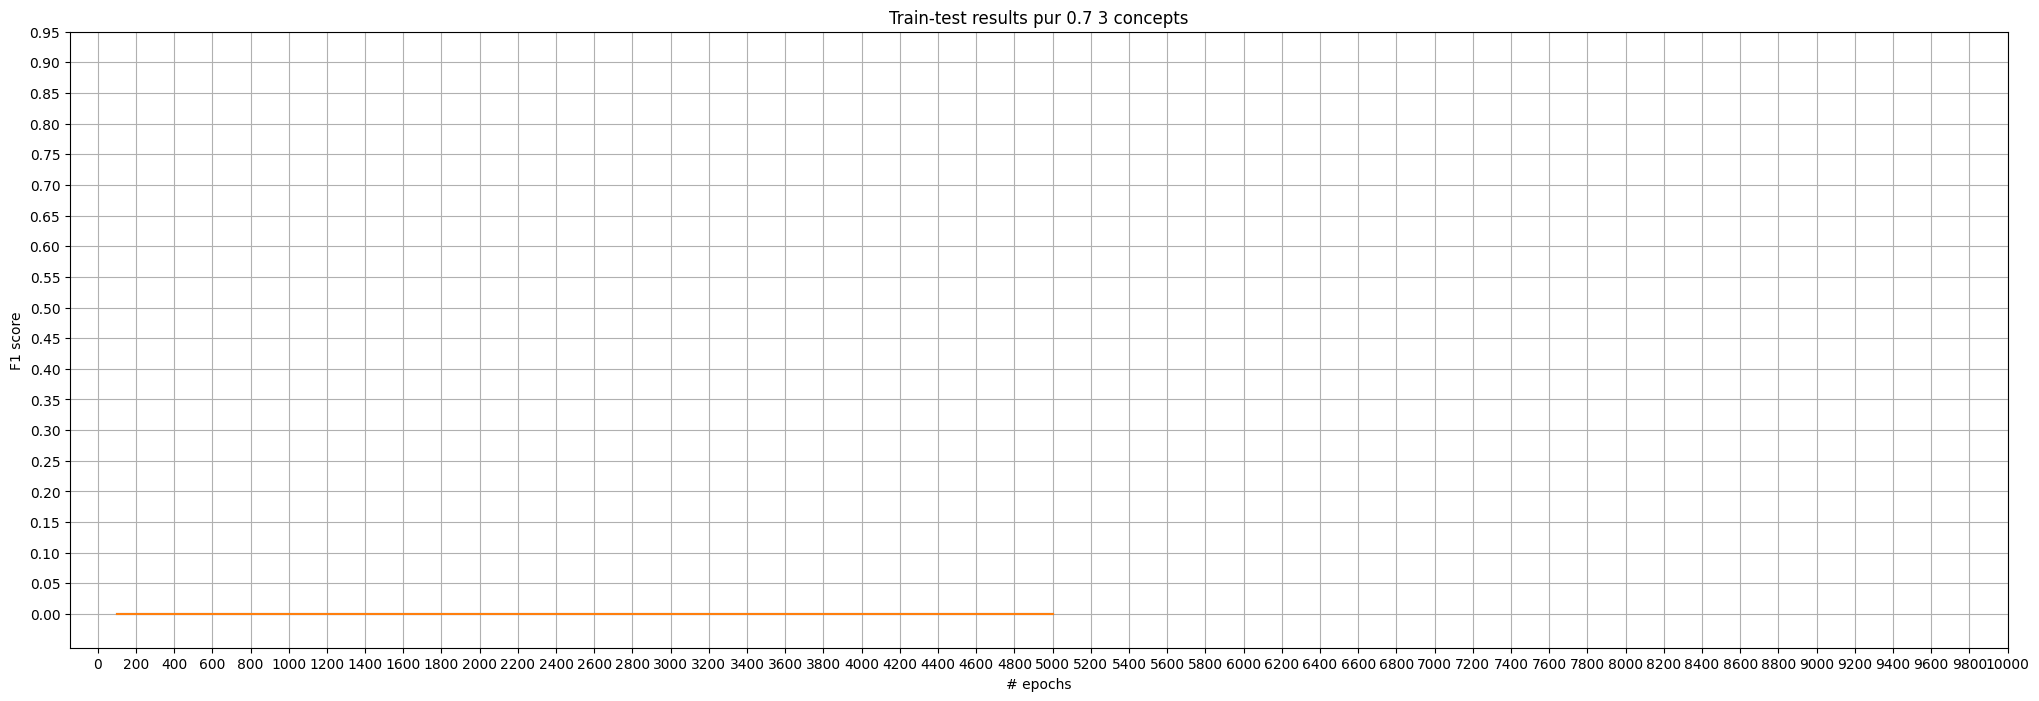

In [25]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(25,8))
plt.plot(epochs_list,f1_list )
plt.plot(epochs_list,f1_list_train)

plt.xlabel("# epochs")
plt.ylabel("F1 score")
plt.grid()
plt.xticks(np.arange(0, 10200, 200))
plt.yticks(np.arange(0, 1, 0.05))

In [26]:
vis = LineVizNx(node_label_font_size=14, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n')

In [27]:
edge_weights = cn.edge_weights_from_network()

/opt/homebrew/Cellar/jupyterlab/4.1.0/libexec/lib/python3.12/site-packages/sparselinear/sparselinear.py:301: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:620.)
  weight = torch.sparse.FloatTensor(self.indices, self.weights, (self.out_features, self.in_features))


Please, modify the ``pos`` dictionary parameter manually. You can obtain the default ``pos`` via Mover.initialize_pos(...) function.

The problematic edges and nodes (in the form of {edge: overlapped nodes indexes}) are:
{(16, 18): frozenset({129}), (16, 20): frozenset({128})}


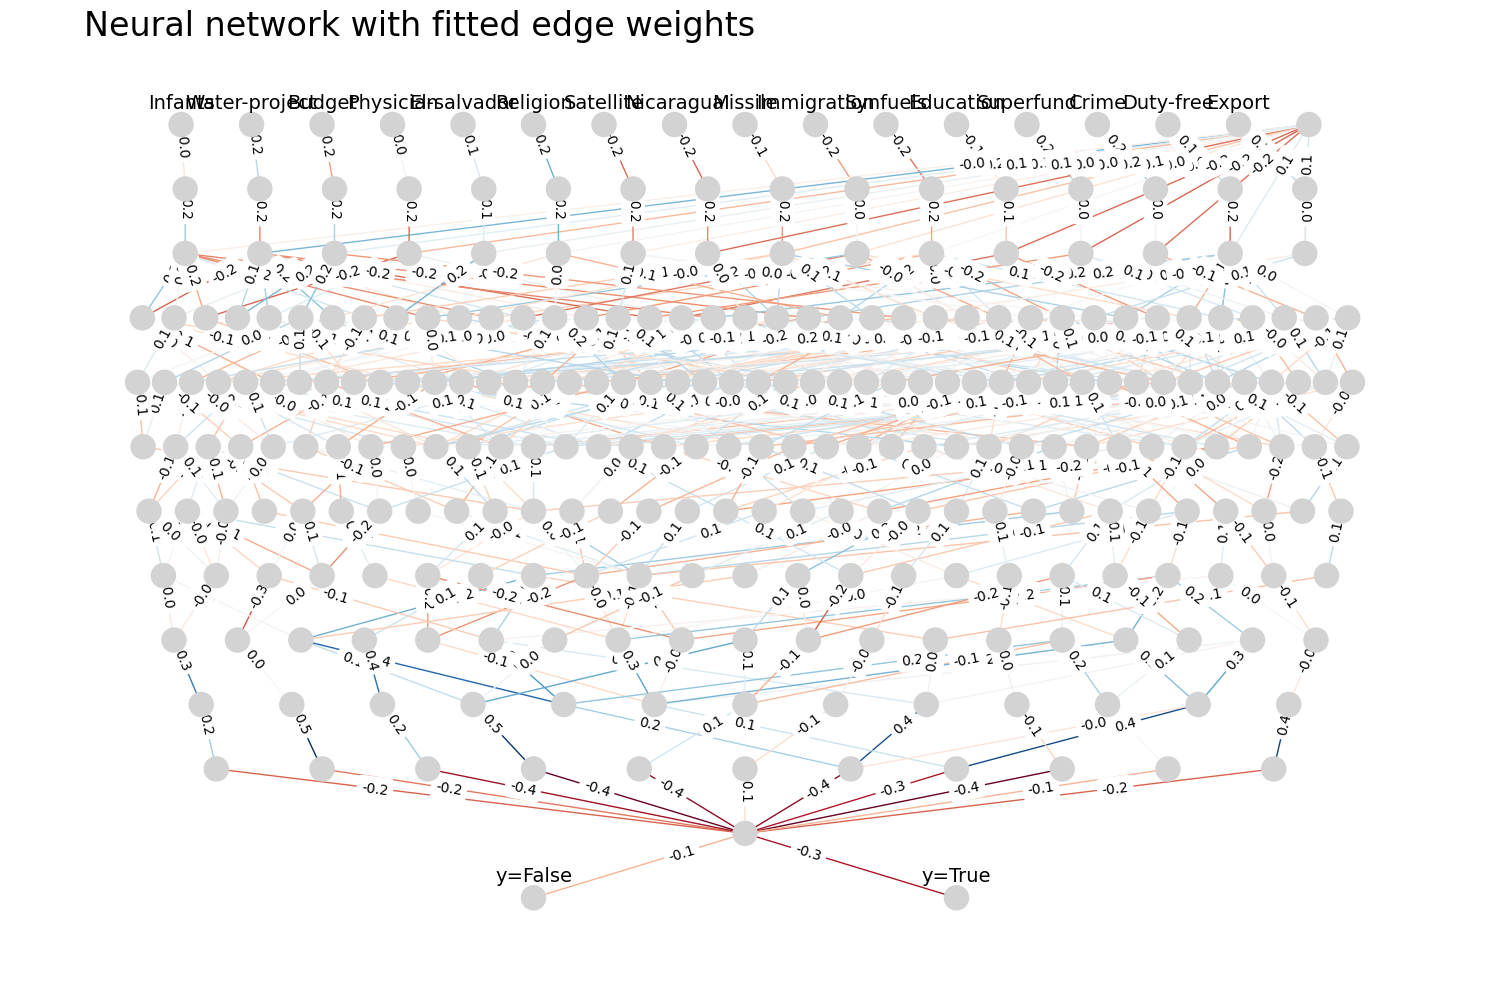

In [28]:
import networkx as nx

fig, ax = plt.subplots(figsize=(15,10))

vis.draw_poset(
    cn.poset, ax=ax, 
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, x=0.05, loc='left')
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('fitted_network.png')
plt.show()

## End of experiments with all concepts

### Purity function

In [29]:
def purity(concept, y_train):
    count_pos = 0
    count_neg = 0
    positive = True
    for obj in concept.extent:
        if y_train[obj] == True:
            count_pos+= 1
        else:
            count_neg+= 1
            
    if count_pos < count_neg:
        positive = False
    if len(concept.extent)!= 0:
        return count_pos, count_neg, max(count_pos, count_neg)/ len(concept.extent), positive
    else:
        return 0,0, 0, False

### Object coverage function

In [30]:
def obj_coverage(concept, y_train):
    return round(len(concept.extent)/len(y_train),2)

### Concept properties calculation

In [31]:
L_prop = []
conc_prop = []
pos = 0 
neg = 0
pur  = 0
pur_list = []
cover = 0
for c in L_:
    conc_prop.append(c) # 0-s element is concepts itself
    pos, neg, pur, positive = purity(c, y_train_)
    pur_list.append(pos)
    pur_list.append(neg)
    pur_list.append(pur)
    pur_list.append(positive)
    cover = obj_coverage(c, y_train_)
    conc_prop.append(pur_list) #  1-s element is purity itself
    conc_prop.append(cover)  #  2-s element is coverage itself
    L_prop.append(conc_prop)
    conc_prop = []
    pur_list = []
    pur = 0
    cover = 0 

In [32]:
pur_list = []
cover_list = []
for c in L_prop:
    pur_list.append(c[1][2]) # just purities
    cover_list.append(c[2])  #just object coverages

In [33]:
print('min-max purity:', min(pur_list), max(pur_list)) # this particular train-test-valid
print('min-max coverage:', min(cover_list), max(cover_list)) # (object coverage)

min-max purity: 0 0.9343065693430657
min-max coverage: 0.0 1.0


In [34]:
for c in L_prop:
    print(round(c[1][2],2),round(c[2],2)) # for each concept print its purity and object coverage

0 0.0
0.86 0.34
0.93 0.39
0.8 0.41
0.63 0.43
0.9 0.44
0.81 0.46
0.83 0.47
0.65 0.49
0.57 0.5
0.93 0.53
0.7 0.53
0.69 0.57
0.86 0.58
0.92 0.58
0.84 0.59
0.62 0.6
0.55 0.61
0.91 0.61
0.88 0.61
0.61 0.61
0.9 0.62
0.58 0.64
0.83 0.64
0.51 0.65
0.84 0.65
0.83 0.65
0.84 0.65
0.57 0.66
0.88 0.67
0.65 0.68
0.54 0.68
0.71 0.69
0.53 0.69
0.84 0.7
0.53 0.7
0.84 0.71
0.53 0.71
0.72 0.71
0.68 0.72
0.81 0.73
0.84 0.73
0.54 0.73
0.54 0.73
0.5 0.74
0.6 0.74
0.68 0.75
0.5 0.75
0.74 0.76
0.82 0.76
0.57 0.76
0.72 0.76
0.73 0.76
0.52 0.78
0.69 0.79
0.75 0.8
0.62 0.8
0.71 0.8
0.77 0.8
0.72 0.81
0.54 0.81
0.54 0.81
0.73 0.81
0.54 0.81
0.55 0.82
0.55 0.82
0.73 0.83
0.59 0.83
0.72 0.84
0.72 0.84
0.71 0.84
0.7 0.85
0.7 0.85
0.71 0.85
0.71 0.85
0.6 0.86
0.64 0.86
0.57 0.86
0.57 0.87
0.57 0.87
0.71 0.88
0.58 0.88
0.69 0.9
0.7 0.9
0.7 0.9
0.59 0.91
0.59 0.91
0.63 0.91
0.59 0.92
0.62 0.92
0.62 0.93
0.6 0.93
0.63 0.93
0.66 0.94
0.6 0.95
0.66 0.95
0.66 0.95
0.61 0.96
0.65 0.97
0.63 1.0


In [35]:
count_pur_one_sided = {} # dictionary of number of concepts in  the purity interval [key,) (from this value and above)
pur_conc_one_sided = {} # dictionary of concept lists in  the purity interval [key, )
pur_conc_all_one_sided ={} # dictionary of all concepts (with all properties) belonging to particular intervals
cov_conc_one_sided = {} # dictionart of all concepts' coverages belonging to particular intervals

for i in np.arange(0, 1, 0.05):
    count_pur_one_sided[round(i,2)] = 0
    pur_conc_one_sided[round(i,2)] = []
    pur_conc_all_one_sided[round(i,2)] = []
    cov_conc_one_sided[round(i,2)] = []
    
   # print(round(i,2))
    for c in L_prop:
        if (c[1][2]>= round(i,2)): # purity above this threshold 
            count_pur_one_sided[round(i,2)]+=1 # how many in this interval
            pur_conc_one_sided[round(i,2)].append(c[0]) # what concepts are in this interval
            pur_conc_all_one_sided[round(i,2)].append(c) # add everything connected to this concepts
            cov_conc_one_sided[round(i,2)].append(c[2]) # add object coverage connected to this concepts
            
# print(count_pur)
# check_1 = 0
# check_2 = 0
# for key in count_pur:
#     check_1+=count_pur[key]
#     check_2+=len(pur_conc[key])
# print(check_1, check_2)

In [36]:
print(count_pur_one_sided)

{0.0: 100, 0.05: 99, 0.1: 99, 0.15: 99, 0.2: 99, 0.25: 99, 0.3: 99, 0.35: 99, 0.4: 99, 0.45: 99, 0.5: 99, 0.55: 84, 0.6: 70, 0.65: 55, 0.7: 41, 0.75: 24, 0.8: 23, 0.85: 10, 0.9: 6, 0.95: 0}


In [37]:
for key in pur_conc_all_one_sided:
    print(key, count_pur_one_sided[key]) # number of concept with purity above this 
    if count_pur_one_sided[key] == 0:
        print('0')
    else:
        print(max(cov_conc_one_sided[key]))

0.0 100
1.0
0.05 99
1.0
0.1 99
1.0
0.15 99
1.0
0.2 99
1.0
0.25 99
1.0
0.3 99
1.0
0.35 99
1.0
0.4 99
1.0
0.45 99
1.0
0.5 99
1.0
0.55 84
1.0
0.6 70
1.0
0.65 55
0.95
0.7 41
0.88
0.75 24
0.8
0.8 23
0.76
0.85 10
0.67
0.9 6
0.62
0.95 0
0


In [38]:
for c in pur_conc_one_sided[0.9]:
    print(L_.index(c))

2
5
10
14
18
21


# Concept analysis

In [39]:
pur_ = 0.9

In [40]:
print('purity > 0.9')
for conc in pur_conc_all_one_sided[pur_]:
    print('positive objects', conc[1][0])
    print('negative objects', conc[1][1])
    print('purity', conc[1][2])
    print(conc[2])
    print(conc[1][3])
    print(conc[0].intent)

purity > 0.9
positive objects 95
negative objects 7
purity 0.9313725490196079
0.39
True
('Physician',)
positive objects 11
negative objects 103
purity 0.9035087719298246
0.44
False
('Duty-free',)
positive objects 9
negative objects 128
purity 0.9343065693430657
0.53
False
('Missile',)
positive objects 12
negative objects 138
purity 0.92
0.58
False
('Nicaragua',)
positive objects 14
negative objects 144
purity 0.9113924050632911
0.61
False
('Budget',)
positive objects 16
negative objects 144
purity 0.9
0.62
False
('Nicaragua', 'Missile')


In [41]:
pur_ = 0.85
print('purity > 0.85')
for conc in pur_conc_all_one_sided[pur_]:
    print('positive objects', conc[1][0])
    print('negative objects', conc[1][1])
    print('purity', conc[1][2])
    print(conc[2])
    print(conc[1][3])
    print(conc[0].intent)

purity > 0.85
positive objects 12
negative objects 76
purity 0.8636363636363636
0.34
False
('Synfuels',)
positive objects 95
negative objects 7
purity 0.9313725490196079
0.39
True
('Physician',)
positive objects 11
negative objects 103
purity 0.9035087719298246
0.44
False
('Duty-free',)
positive objects 9
negative objects 128
purity 0.9343065693430657
0.53
False
('Missile',)
positive objects 21
negative objects 128
purity 0.8590604026845637
0.58
False
('Synfuels', 'Duty-free')
positive objects 12
negative objects 138
purity 0.92
0.58
False
('Nicaragua',)
positive objects 14
negative objects 144
purity 0.9113924050632911
0.61
False
('Budget',)
positive objects 19
negative objects 139
purity 0.879746835443038
0.61
False
('Missile', 'Duty-free')
positive objects 16
negative objects 144
purity 0.9
0.62
False
('Nicaragua', 'Missile')
positive objects 21
negative objects 152
purity 0.8786127167630058
0.67
False
('Missile', 'Synfuels')


In [42]:
pur_ = 0.8
print('purity > 0.8')
pur_8 = pd.DataFrame(columns = ['pos','neg','pur', 'cov', 'pos?', 'intent'])
for conc in pur_conc_all_one_sided[pur_]:
    if conc[1][2]< 0.85:
        pur_8.loc[len(pur_8)] = [conc[1][0], conc[1][1], round(conc[1][2],2), conc[2], conc[1][3], conc[0].intent]
        print('positive objects', conc[1][0])
        print('negative objects', conc[1][1])
        print('purity', conc[1][2])
        print(conc[2])
        print(conc[1][3])
        print(conc[0].intent)
pur_8.to_csv('pur_from_08_to_085.csv')

purity > 0.8
positive objects 86
negative objects 21
purity 0.8037383177570093
0.41
True
('Education',)
positive objects 95
negative objects 23
purity 0.8050847457627118
0.46
True
('Physician', 'Education')
positive objects 21
negative objects 102
purity 0.8292682926829268
0.47
False
('Infants',)
positive objects 24
negative objects 128
purity 0.8421052631578947
0.59
False
('Satellite',)
positive objects 29
negative objects 137
purity 0.8253012048192772
0.64
False
('Infants', 'Synfuels')
positive objects 27
negative objects 142
purity 0.8402366863905325
0.65
False
('Infants', 'Missile')
positive objects 29
negative objects 140
purity 0.8284023668639053
0.65
False
('Infants', 'Duty-free')
positive objects 27
negative objects 142
purity 0.8402366863905325
0.65
False
('Satellite', 'Duty-free')
positive objects 29
negative objects 152
purity 0.8397790055248618
0.7
False
('Infants', 'Budget')
positive objects 29
negative objects 154
purity 0.8415300546448088
0.71
False
('Missile', 'Synfuels

In [43]:
pur_ = 0.75
print('purity > 0.75')
for conc in pur_conc_all_one_sided[pur_]:
    print('positive objects', conc[1][0])
    print('negative objects', conc[1][1])
    print(conc[1][3])
    print(conc[0].intent)

purity > 0.75
positive objects 12
negative objects 76
False
('Synfuels',)
positive objects 95
negative objects 7
True
('Physician',)
positive objects 86
negative objects 21
True
('Education',)
positive objects 11
negative objects 103
False
('Duty-free',)
positive objects 95
negative objects 23
True
('Physician', 'Education')
positive objects 21
negative objects 102
False
('Infants',)
positive objects 9
negative objects 128
False
('Missile',)
positive objects 21
negative objects 128
False
('Synfuels', 'Duty-free')
positive objects 12
negative objects 138
False
('Nicaragua',)
positive objects 24
negative objects 128
False
('Satellite',)
positive objects 14
negative objects 144
False
('Budget',)
positive objects 19
negative objects 139
False
('Missile', 'Duty-free')
positive objects 16
negative objects 144
False
('Nicaragua', 'Missile')
positive objects 29
negative objects 137
False
('Infants', 'Synfuels')
positive objects 27
negative objects 142
False
('Infants', 'Missile')
positive obje

## 2 concepts

### 3. Check for purity above 0.8

In [44]:
pur_3 = 0.8
L_ind_3 = []
for conc in pur_conc_all_one_sided[pur_3]:
    L_ind_3.append(L_.index(conc[0]))
print(L_ind_3)

[1, 2, 3, 5, 6, 7, 10, 13, 14, 15, 18, 19, 21, 23, 25, 26, 27, 29, 34, 36, 40, 41, 49]


In [45]:
len(L_ind_3)

23

### 1: Check for purity above 0.9

In [94]:
pur_ = 0.9
L_ind_ = []
for conc in pur_conc_all_one_sided[pur_]:
    L_ind_.append(L_.index(conc[0]))
print(L_ind_)

[2, 5, 10, 14, 18, 21]


### 2: Check for purity above 0.85

In [335]:
pur_2 = 0.85
L_ind_2 = []
for conc in pur_conc_all_one_sided[pur_2]:
    print(conc[0].intent)
    L_ind_2.append(L_.index(conc[0]))
print(L_ind_2)

('Synfuels',)
('Physician',)
('Duty-free',)
('Missile',)
('Synfuels', 'Duty-free')
('Nicaragua',)
('Budget',)
('Missile', 'Duty-free')
('Nicaragua', 'Missile')
('Missile', 'Synfuels')
[1, 2, 5, 10, 13, 14, 18, 19, 21, 29]


### 3. Let's try all concepts from the interval >0.8

In [48]:
union_coverage_obj = set((pur_conc_all_one_sided[pur_3][0][0].extent))
for conc in pur_conc_all_one_sided[pur_3]:
    print(conc[2])
    union_coverage_obj = union_coverage_obj.union(set(conc[0].extent))
print(round(len(union_coverage_obj)/len(y_train_),2))

0.34
0.39
0.41
0.44
0.46
0.47
0.53
0.58
0.58
0.59
0.61
0.61
0.62
0.64
0.65
0.65
0.65
0.67
0.7
0.71
0.73
0.73
0.76
1.0


In [49]:
import neural_lib58 as nl
import matplotlib as plt

f1_list = []
f1_list_train = []
f1_list_valid = []
epochs_list = []

res_80_all = pd.DataFrame(columns = ['epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])

cn = nl.ConceptNetwork.from_lattice(L_, L_ind_3, sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
for i in range(80):
    k = 50
    print('Epoch ', k*(i+1))
    epochs_list.append(k*(i+1))
    if i == 0:
        cn.fit(X_train_, y_train_, k)
    else:
        cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_)
    pred_train_all = cn.predict(X_train_)
    pred_val_all = cn.predict(X_valid)
    pred_valid = pred_val_all[1]
    pred = pred_all[1]
    pred_train = pred_train_all[1]
    

    print('score train:', f1_score(y_train_, pred_train))
    print('score val:', f1_score(y_valid, pred_valid))
    print('score test:', f1_score(y_test_, pred))
    f1_list.append(f1_score(y_test_, pred))
    f1_list_train.append(f1_score(y_train_, pred_train))
    f1_list_valid.append(f1_score(y_valid, pred_valid))
    res_80_all.loc[len(res_80_all)] = [k*(i+1), f1_score(y_train_, pred_train), f1_score(y_valid, pred_valid), f1_score(y_test_, pred)]

    


Epoch  50
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  100
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  150
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  200
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  250
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  300
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  350
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  400
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  450
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  500
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  550
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  600
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  650
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  700
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  750
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  800
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  850
score train: 0.0
score val: 0.0
score test: 0.

In [460]:
res_80_all.to_csv('House_Votes_80_all.csv')

([<matplotlib.axis.YTick at 0x296d130e0>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.55, '0.55'),
  Text(0, 0.6000000000000001, '0.60'),
  Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.75, '0.75'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.8500000000000001, '0.85'),
  Text(0, 0.9, '0.90'),
  Text(0, 0.9500000000000001, '0.95'),
  Text(0, 1.0, '1.00')])

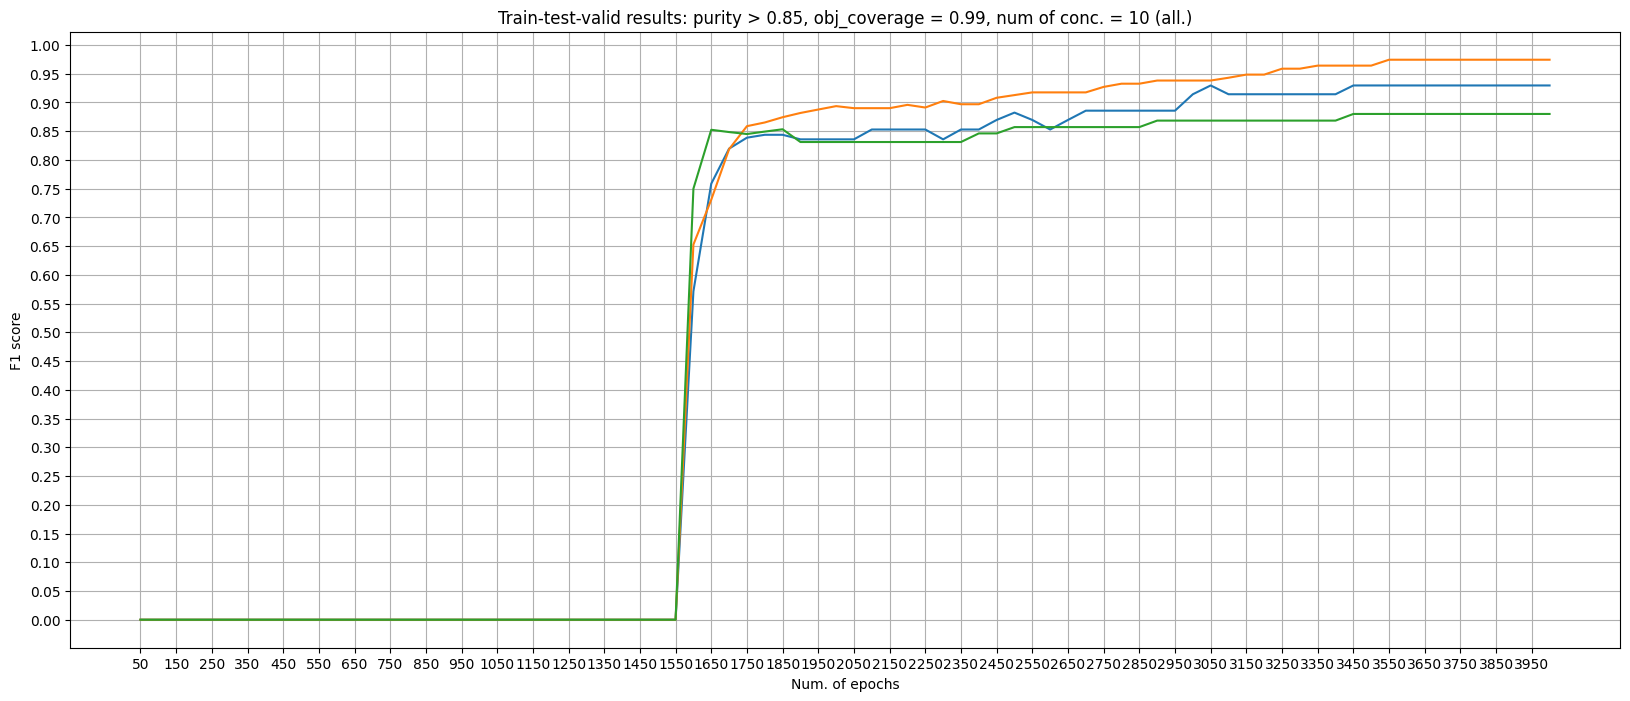

In [50]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,8))
plt.plot(epochs_list,f1_list )
plt.plot(epochs_list,f1_list_train)
plt.plot(epochs_list, f1_list_valid)
plt.title('Train-test-valid results: purity > 0.85, obj_coverage = 0.99, num of conc. = 10 (all.)')
plt.xlabel("Num. of epochs")
plt.ylabel("F1 score")
plt.grid()
plt.xticks(np.arange(50, 4050, 100))
plt.yticks(np.arange(0, 1.05, 0.05))

In [51]:
res_80_all[res_80_all['epoch']==2000]

,epoch,F1_score_train,F1_score_val,F1_score_test
39,2000.0,0.893617,0.831169,0.835821


### 2. Let's try all concepts from this interval: (10) (purity > 0.85

#### 1) They cover:

In [366]:
union_coverage_obj = set((pur_conc_all_one_sided[pur_2][0][0].extent))
for conc in pur_conc_all_one_sided[pur_2]:
    print(conc[2])
    union_coverage_obj = union_coverage_obj.union(set(conc[0].extent))
print(round(len(union_coverage_obj)/len(y_train_),2))
    

0.34
0.39
0.44
0.53
0.58
0.58
0.61
0.61
0.62
0.67
0.99


#### Checking the performance:


In [355]:
import neural_lib58 as nl
import matplotlib as plt

f1_list = []
f1_list_train = []
f1_list_valid = []
epochs_list = []

res_85_all = pd.DataFrame(columns = ['epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])

cn = nl.ConceptNetwork.from_lattice(L_, L_ind_2, sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
for i in range(80):
    k = 50
    print('Epoch ', k*(i+1))
    epochs_list.append(k*(i+1))
    if i == 0:
        cn.fit(X_train_, y_train_, k)
    else:
        cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_)
    pred_train_all = cn.predict(X_train_)
    pred_val_all = cn.predict(X_valid)
    pred_valid = pred_val_all[1]
    pred = pred_all[1]
    pred_train = pred_train_all[1]
    

    print('score train:', f1_score(y_train_, pred_train))
    print('score val:', f1_score(y_valid, pred_valid))
    print('score test:', f1_score(y_test_, pred))
    f1_list.append(f1_score(y_test_, pred))
    f1_list_train.append(f1_score(y_train_, pred_train))
    f1_list_valid.append(f1_score(y_valid, pred_valid))
    res_85_all.loc[len(res_85_all)] = [k*(i+1), f1_score(y_train_, pred_train), f1_score(y_valid, pred_valid), f1_score(y_test_, pred)]

    


Epoch  50
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  100
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  150
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  200
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  250
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  300
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  350
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  400
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  450
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  500
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  550
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  600
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  650
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  700
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  750
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  800
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  850
score train: 0.624113475177305
score val: 0.70

In [348]:
res_85_all.to_csv('res_85_all.csv')
res_90_all.to_csv('res_90_all.csv')

In [347]:
res_85_all[res_85_all['epoch']==1600]

,epoch,F1_score_train,F1_score_val,F1_score_test
31,1600.0,0.882051,0.842105,0.84507


([<matplotlib.axis.YTick at 0x29faea660>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.55, '0.55'),
  Text(0, 0.6000000000000001, '0.60'),
  Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.75, '0.75'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.8500000000000001, '0.85'),
  Text(0, 0.9, '0.90'),
  Text(0, 0.9500000000000001, '0.95'),
  Text(0, 1.0, '1.00')])

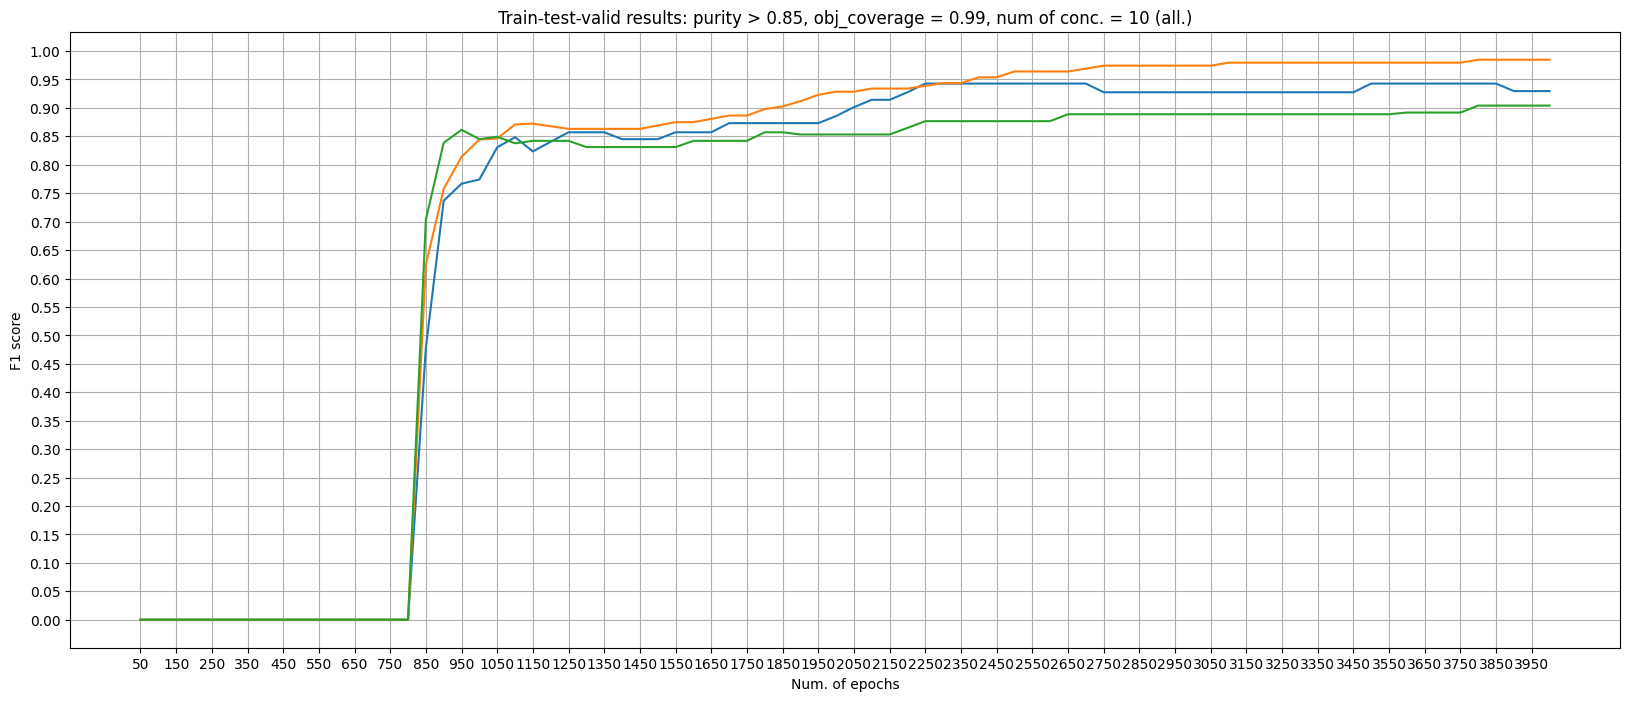

In [356]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,8))
plt.plot(epochs_list,f1_list )
plt.plot(epochs_list,f1_list_train)
plt.plot(epochs_list, f1_list_valid)
plt.title('Train-test-valid results: purity > 0.85, obj_coverage = 0.99, num of conc. = 10 (all.)')
plt.xlabel("Num. of epochs")
plt.ylabel("F1 score")
plt.grid()
plt.xticks(np.arange(50, 4050, 100))
plt.yticks(np.arange(0, 1.05, 0.05))

In [464]:
vis = LineVizNx(node_label_font_size=14, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n')
edge_weights = cn.edge_weights_from_network()

In [465]:
descr = {'Synfuels', 'Physician', 'Duty-free', 'Missile', 'Nicaragua', 'Budget'}

traced = cn.trace_description(descr, include_targets=False)

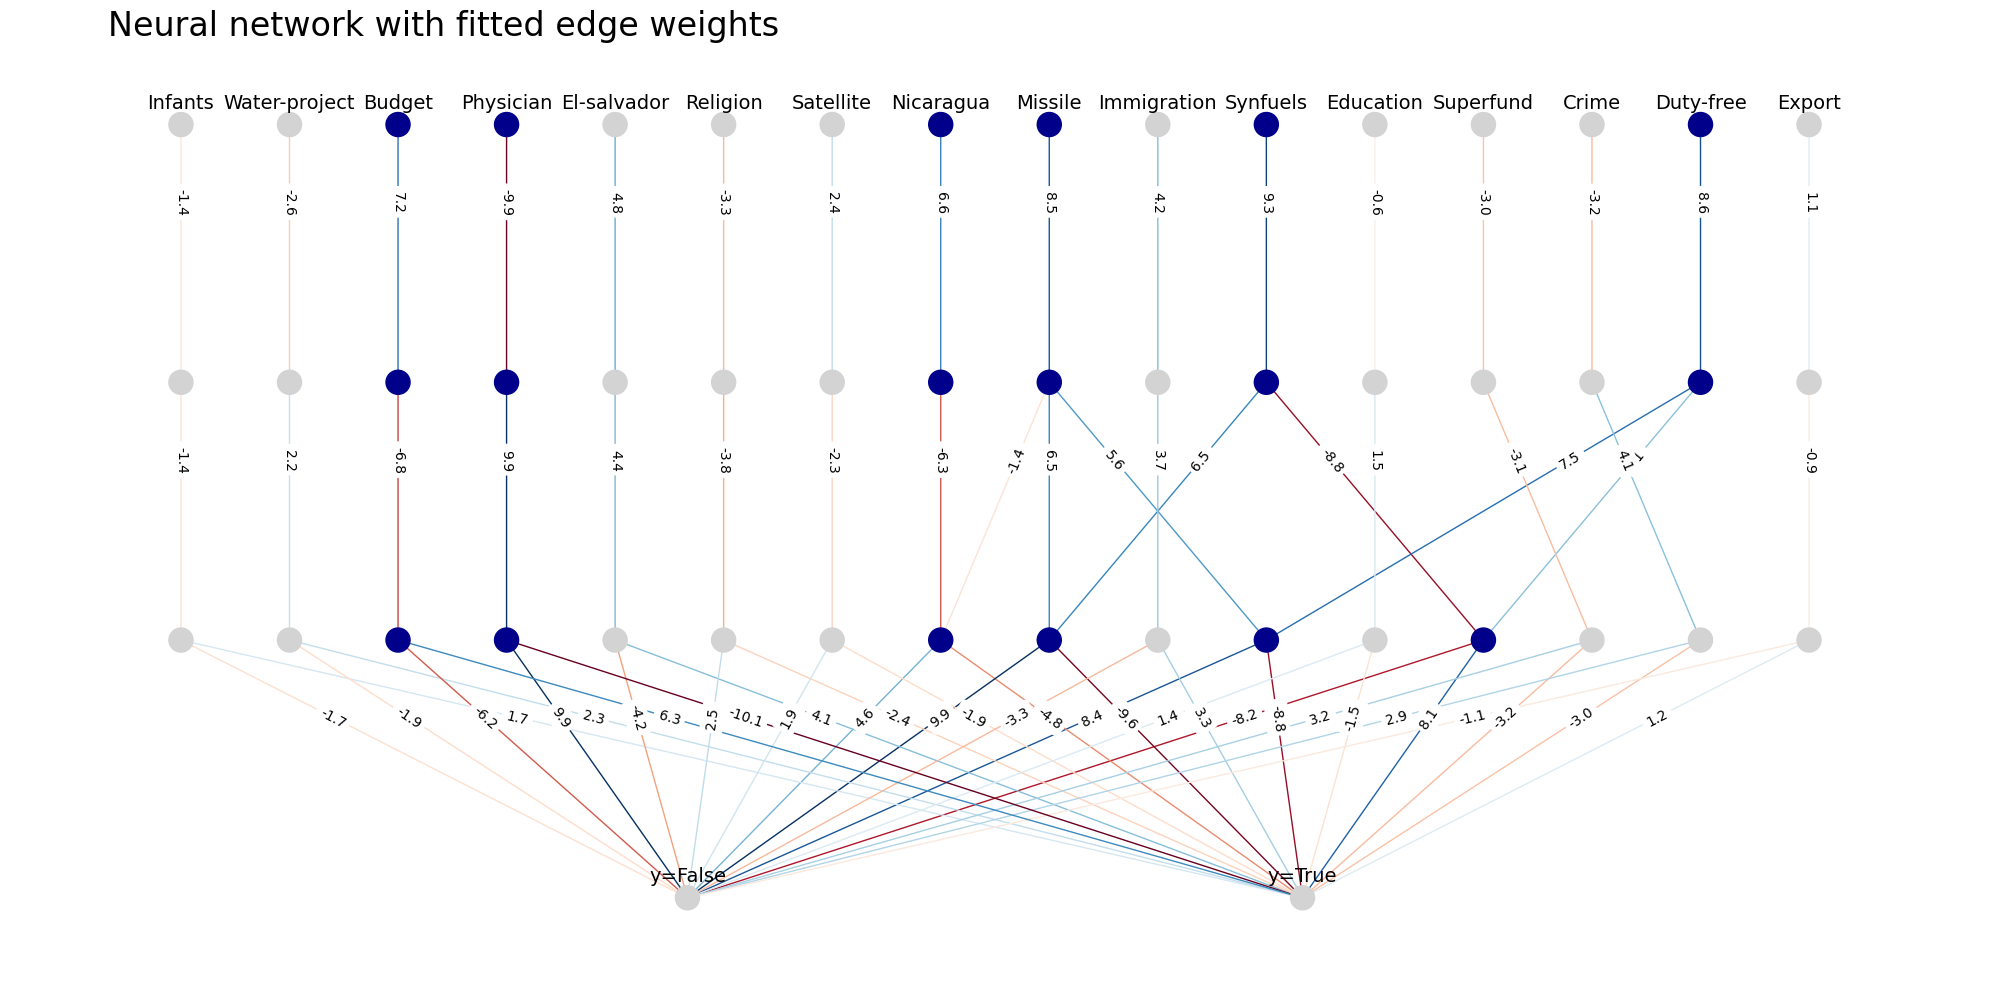

In [466]:
import networkx as nx

fig, ax = plt.subplots(figsize=(20,10))

vis.draw_poset(
    cn.poset, ax=ax, 
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))],
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, x=0.05, loc='left')
plt.tight_layout()
plt.subplots_adjust()
#plt.savefig('fitted_network.png')
plt.show()

### Let's try all concepts from this interval: (6) (purity > 0.9)

#### 1) They cover:

In [278]:
union_coverage_obj = set((pur_conc_all_one_sided[pur_][0][0].extent))
for conc in pur_conc_all_one_sided[pur_]:
    print(conc[2])
    union_coverage_obj = union_coverage_obj.union(set(conc[0].extent))
print(round(len(union_coverage_obj)/len(y_train_),2))
    

0.39
0.44
0.53
0.58
0.61
0.62
0.98


#### Checking the performance:

In [361]:
import neural_lib58 as nl
import matplotlib as plt

f1_list = []
f1_list_train = []
f1_list_valid = []
epochs_list = []

res_90_all = pd.DataFrame(columns = ['epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])

cn = nl.ConceptNetwork.from_lattice(L_, L_ind_, sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
for i in range(80):
    k = 50
    print('Epoch ', k*(i+1))
    epochs_list.append(k*(i+1))
    if i == 0:
        cn.fit(X_train_, y_train_, k)
    else:
        cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_)
    pred_train_all = cn.predict(X_train_)
    pred_val_all = cn.predict(X_valid)
    pred_valid = pred_val_all[1]
    pred = pred_all[1]
    pred_train = pred_train_all[1]
    

    print('score train:', f1_score(y_train_, pred_train))
    print('score val:', f1_score(y_valid, pred_valid))
    print('score test:', f1_score(y_test_, pred))
    f1_list.append(f1_score(y_test_, pred))
    f1_list_train.append(f1_score(y_train_, pred_train))
    f1_list_valid.append(f1_score(y_valid, pred_valid))
    res_90_all.loc[len(res_90_all)] = [k*(i+1), f1_score(y_train_, pred_train), f1_score(y_valid, pred_valid), f1_score(y_test_, pred)]

    


Epoch  50
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  100
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  150
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  200
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  250
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  300
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  350
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  400
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  450
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  500
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  550
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  600
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  650
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  700
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  750
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  800
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  850
score train: 0.11650485436893204
score val: 0.

([<matplotlib.axis.YTick at 0x111e2ce90>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.55, '0.55'),
  Text(0, 0.6000000000000001, '0.60'),
  Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.75, '0.75'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.8500000000000001, '0.85'),
  Text(0, 0.9, '0.90'),
  Text(0, 0.9500000000000001, '0.95'),
  Text(0, 1.0, '1.00')])

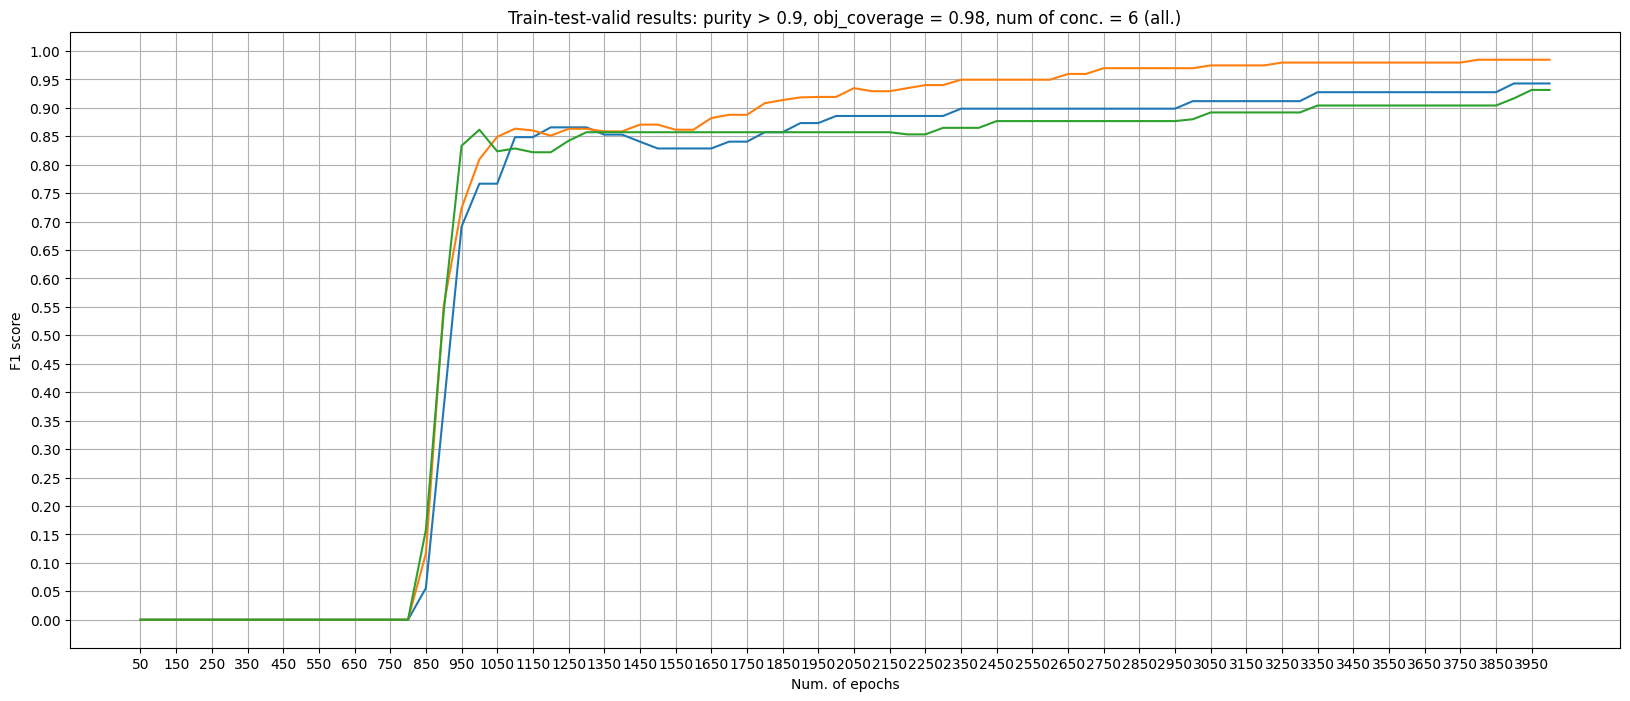

In [362]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,8))
plt.plot(epochs_list,f1_list )
plt.plot(epochs_list,f1_list_train)
plt.plot(epochs_list, f1_list_valid)
plt.title('Train-test-valid results: purity > 0.9, obj_coverage = 0.98, num of conc. = 6 (all.)')
plt.xlabel("Num. of epochs")
plt.ylabel("F1 score")
plt.grid()
plt.xticks(np.arange(50, 4050, 100))
plt.yticks(np.arange(0, 1.05, 0.05))

In [284]:
res_90_all[res_90_all['epoch'] == 1550]

,epoch,F1_score_train,F1_score_val,F1_score_test
30,1550.0,0.865979,0.853333,0.857143


In [644]:
for col in X_train_.columns:
    print(X_train_[col].value_counts())

Infants
False    136
True     123
Name: count, dtype: int64
Water-project
False    148
True     111
Name: count, dtype: int64
Budget
True     158
False    101
Name: count, dtype: int64
Physician
False    157
True     102
Name: count, dtype: int64
El-salvador
False    134
True     125
Name: count, dtype: int64
Religion
True     157
False    102
Name: count, dtype: int64
Satellite
True     152
False    107
Name: count, dtype: int64
Nicaragua
True     150
False    109
Name: count, dtype: int64
Missile
True     137
False    122
Name: count, dtype: int64
Immigration
False    130
True     129
Name: count, dtype: int64
Synfuels
False    171
True      88
Name: count, dtype: int64
Education
False    152
True     107
Name: count, dtype: int64
Superfund
False    132
True     127
Name: count, dtype: int64
Crime
True     145
False    114
Name: count, dtype: int64
Duty-free
False    145
True     114
Name: count, dtype: int64
Export
True     217
False     42
Name: count, dtype: int64


In [237]:
vis = LineVizNx(node_label_font_size=14, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n')
edge_weights = cn.edge_weights_from_network()

In [249]:
descr = {'Physician', 'Duty-free', 'Missile', 'Nicaragua', 'Budget'}

traced = cn.trace_description(descr, include_targets=False)

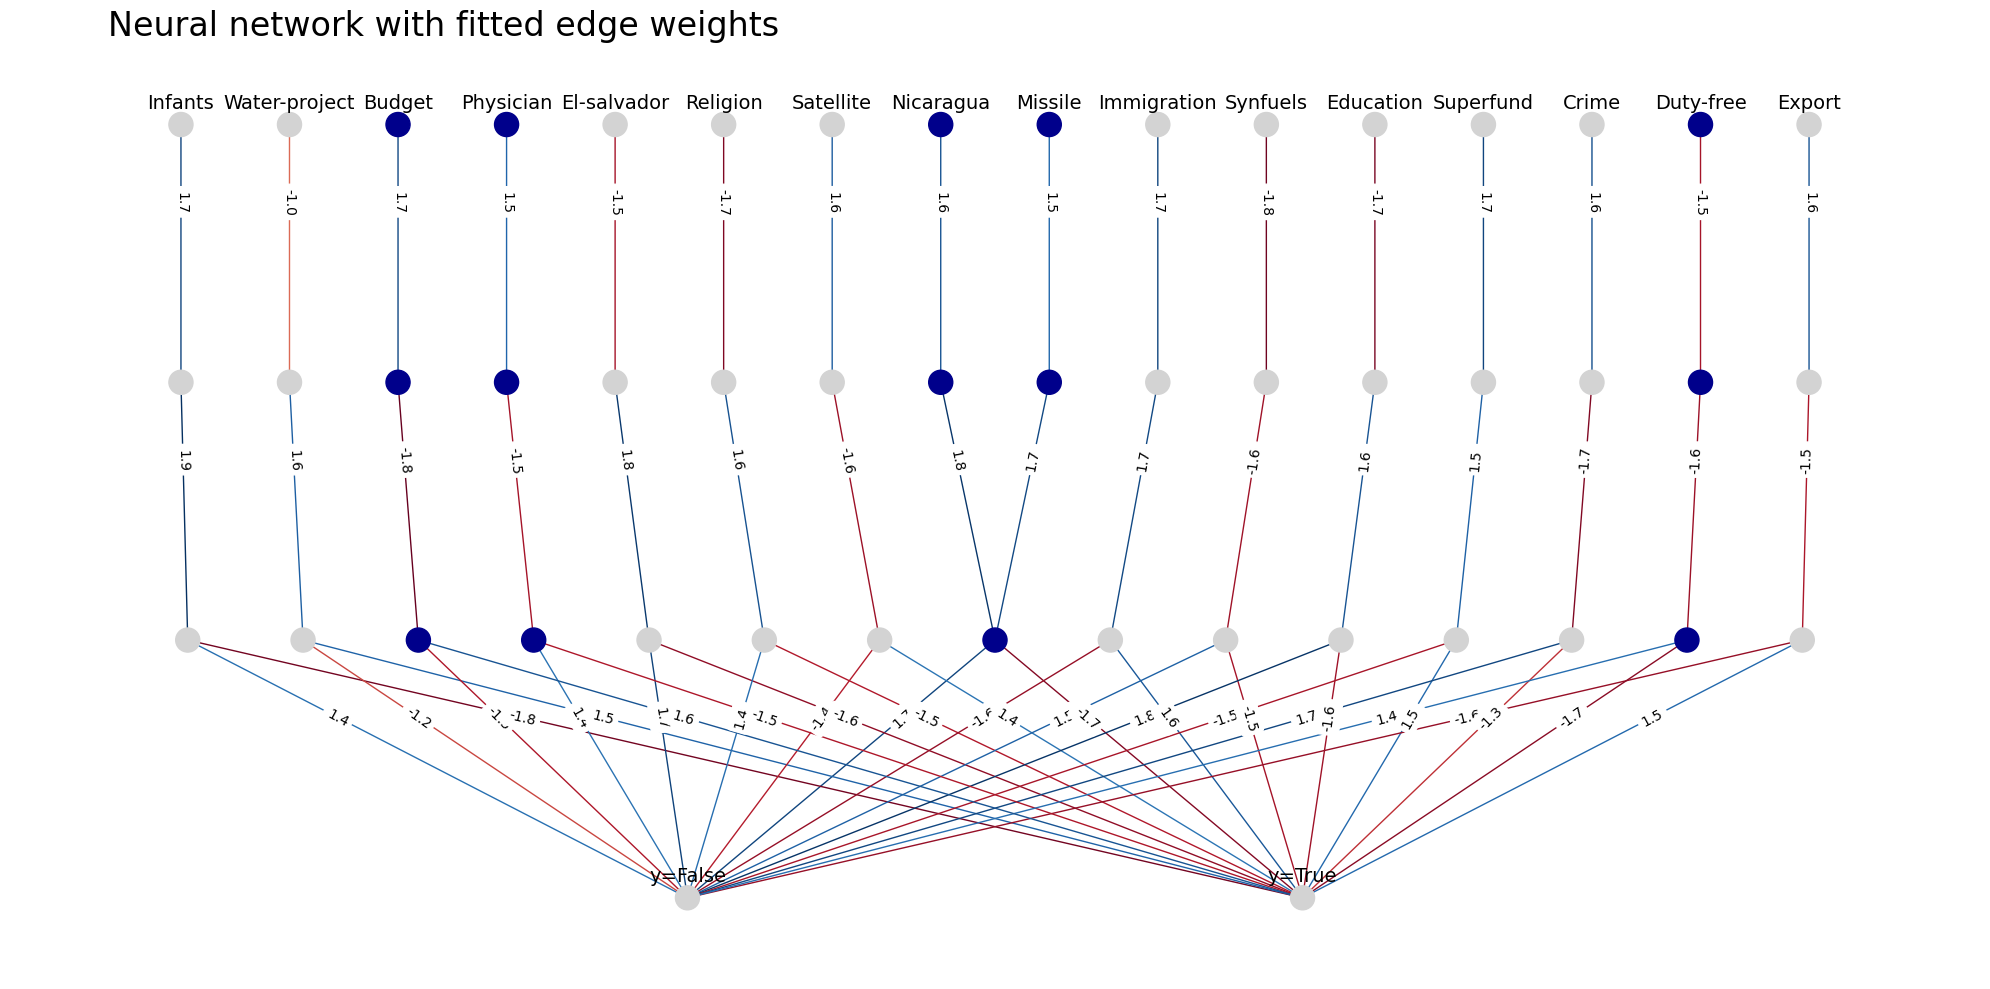

In [250]:
import networkx as nx

fig, ax = plt.subplots(figsize=(20,10))

vis.draw_poset(
    cn.poset, ax=ax, 
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))],
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, x=0.05, loc='left')
plt.tight_layout()
plt.subplots_adjust()
#plt.savefig('fitted_network.png')
plt.show()

#### Choosing 2 concepts with maximal union coverage with purity above 0.9

#### Counting concept coverage one-by-one

In [133]:
n = 2
pur_ = 0.9
sorted_cov = sorted(cov_conc_one_sided[pur_])

t = count_pur_one_sided[pur_]


conc_list_ = {}
L_ind_used_prior = {}
full_list_ind = {}

# i -> priority
for i in range(1,t+1):
    for c in pur_conc_all_one_sided[pur_]:
        if c[2] == sorted_cov[-i]:
            first_c = c
            break

    list_param = []
    conc_prior = []
    max_cov = set(first_c[0].extent)
    chosen = first_c
  #  print(len(max_cov))

    for conc in pur_conc_all_one_sided[pur_]:
        if len(max_cov) < len(set(first_c[0].extent).union(set(conc[0].extent))):
          #  print(len(set(conc[0].extent)))
            cover_un = round(len(set(first_c[0].extent).union(set(conc[0].extent)))/len(y_train_),2)
            print(cover_un)
            max_cov = set(first_c[0].extent).union(set(conc[0].extent))
            chosen = conc
 #   print(len(max_cov), chosen[1], chosen[2])


    conc_prior.append(first_c)
    conc_prior.append(chosen)
    list_param.append(conc_prior)
    list_param.append(cover_un)
    conc_list_[i] = list_param
   # print(conc_list_)

    L_ind_used_prior[i] = []
    full_list_ind[i] = [] 
    full_list_ind[i].append(cover_un)
    for c in conc_prior:
        L_ind_used_prior[i].append(L_.index(c[0]))
    full_list_ind[i].append( L_ind_used_prior[i])
print(full_list_ind)

0.94
0.93
0.92
0.88
0.79
0.79
0.88
0.92
0.93
0.94
{1: [0.94, [21, 2]], 2: [0.93, [18, 2]], 3: [0.92, [14, 2]], 4: [0.88, [10, 2]], 5: [0.79, [5, 2]], 6: [0.94, [2, 21]]}


## 2 concepts with purity > 0.85

In [367]:
n = 2
pur_2 = 0.85
sorted_cov = sorted(cov_conc_one_sided[pur_2])

t = count_pur_one_sided[pur_2]


conc_list_ = {}
L_ind_used_prior = {}
full_list_ind = {}

# i -> priority
for i in range(1,t+1):
    for c in pur_conc_all_one_sided[pur_2]:
        if c[2] == sorted_cov[-i]:
            print('lala', sorted_cov[-i])
            print('fc',L_.index(first_c[0]))
            first_c = c
            break

    list_param = []
    conc_prior = []
    max_cov = set(first_c[0].extent)
    chosen = first_c
  #  print(len(max_cov))

    for conc in pur_conc_all_one_sided[pur_2]:
        if len(max_cov) < len(set(first_c[0].extent).union(set(conc[0].extent))):
          #  print(len(set(conc[0].extent)))
            cover_un = round(len(set(first_c[0].extent).union(set(conc[0].extent)))/len(y_train_),2)
            print(cover_un)
            max_cov = set(first_c[0].extent).union(set(conc[0].extent))
            chosen = conc
 #   print(len(max_cov), chosen[1], chosen[2])


    conc_prior.append(first_c)
    conc_prior.append(chosen)
    list_param.append(conc_prior)
    list_param.append(cover_un)
    conc_list_[i] = list_param
   # print(conc_list_)

    L_ind_used_prior[i] = []
    full_list_ind[i] = [] 
    full_list_ind[i].append(cover_un)
    for c in conc_prior:
        L_ind_used_prior[i].append(L_.index(c[0]))
    full_list_ind[i].append( L_ind_used_prior[i])
print(full_list_ind)

lala 0.67
fc 1
0.96
lala 0.62
fc 29
0.7
0.94
lala 0.61
fc 21
0.7
0.93
lala 0.61
fc 18
0.7
0.93
lala 0.58
fc 18
0.86
lala 0.58
fc 13
0.86
lala 0.53
fc 13
0.67
0.88
lala 0.44
fc 10
0.58
0.79
lala 0.39
fc 5
0.66
0.79
0.88
0.92
0.93
0.94
0.96
lala 0.34
fc 2
0.66
0.67
0.68
0.7
0.71
{1: [0.96, [29, 2]], 2: [0.94, [21, 2]], 3: [0.93, [18, 2]], 4: [0.93, [18, 2]], 5: [0.86, [13, 2]], 6: [0.86, [13, 2]], 7: [0.88, [10, 2]], 8: [0.79, [5, 2]], 9: [0.96, [2, 29]], 10: [0.71, [1, 19]]}


In [529]:
print(L_[1].intent)
print(L_[19].intent)

('Synfuels',)
('Missile', 'Duty-free')


### 2 concepts with purity above 0.8

In [74]:
n = 2
pur_3 = 0.8
sorted_cov = sorted(cov_conc_one_sided[pur_3])

t = count_pur_one_sided[pur_3]


conc_list_ = {}
L_ind_used_prior = {}
full_list_ind = {}

# i -> priority
for i in range(1,t+1):
    for c in pur_conc_all_one_sided[pur_3]:
        if c[2] == sorted_cov[-i]:
            #print('lala', sorted_cov[-i])
            #print('fc',L_.index(first_c[0]))
            first_c = c
            break

    list_param = []
    conc_prior = []
    max_cov = set(first_c[0].extent)
    chosen = first_c
  #  print(len(max_cov))

    for conc in pur_conc_all_one_sided[pur_3]:
        if len(max_cov) < len(set(first_c[0].extent).union(set(conc[0].extent))):
          #  print(len(set(conc[0].extent)))
            cover_un = round(len(set(first_c[0].extent).union(set(conc[0].extent)))/len(y_train_),2)
            #print(cover_un)
            max_cov = set(first_c[0].extent).union(set(conc[0].extent))
            chosen = conc
 #   print(len(max_cov), chosen[1], chosen[2])


    conc_prior.append(first_c)
    conc_prior.append(chosen)
    list_param.append(conc_prior)
    list_param.append(cover_un)
    conc_list_[i] = list_param
   # print(conc_list_)

    L_ind_used_prior[i] = []
    full_list_ind[i] = [] 
    full_list_ind[i].append(cover_un)
    for c in conc_prior:
        L_ind_used_prior[i].append(L_.index(c[0]))
    full_list_ind[i].append( L_ind_used_prior[i])
print(full_list_ind)

{1: [1.0, [49, 6]], 2: [0.97, [40, 6]], 3: [0.97, [40, 6]], 4: [0.98, [36, 6]], 5: [0.98, [34, 6]], 6: [0.97, [29, 6]], 7: [0.95, [25, 6]], 8: [0.95, [25, 6]], 9: [0.95, [25, 6]], 10: [0.92, [23, 6]], 11: [0.97, [21, 6]], 12: [0.96, [18, 6]], 13: [0.96, [18, 6]], 14: [0.92, [15, 6]], 15: [0.88, [13, 6]], 16: [0.88, [13, 6]], 17: [0.91, [10, 6]], 18: [0.82, [7, 6]], 19: [1.0, [6, 49]], 20: [0.82, [5, 6]], 21: [1.0, [3, 49]], 22: [0.99, [2, 49]], 23: [0.78, [1, 41]]}


In [72]:
print('1', L_[49].intent, L_[6].intent)
print('21', L_[3].intent, L_[49].intent)
print('22', L_[2].intent, L_[49].intent)
print('4', L_[36].intent, L_[6].intent)
print('5', L_[34].intent, L_[6].intent)
print('2', L_[40].intent, L_[6].intent)
print('6', L_[29].intent, L_[6].intent)
print('11', L_[21].intent, L_[6].intent)
print('12', L_[18].intent, L_[6].intent)
print('7', L_[25].intent, L_[6].intent)
print('10', L_[23].intent, L_[6].intent)
print('14', L_[15].intent, L_[6].intent)
print('17', L_[10].intent, L_[6].intent)
print('15', L_[13].intent, L_[6].intent)
print('18', L_[7].intent, L_[6].intent)
print('20', L_[5].intent, L_[6].intent)
print('23', L_[1].intent, L_[41].intent)

1 ('Budget', 'Nicaragua', 'Missile', 'Synfuels', 'Duty-free') ('Physician', 'Education')
21 ('Education',) ('Budget', 'Nicaragua', 'Missile', 'Synfuels', 'Duty-free')
22 ('Physician',) ('Budget', 'Nicaragua', 'Missile', 'Synfuels', 'Duty-free')
4 ('Missile', 'Synfuels', 'Duty-free') ('Physician', 'Education')
5 ('Infants', 'Budget') ('Physician', 'Education')
2 ('Infants', 'Synfuels', 'Duty-free') ('Physician', 'Education')
6 ('Missile', 'Synfuels') ('Physician', 'Education')
11 ('Nicaragua', 'Missile') ('Physician', 'Education')
12 ('Budget',) ('Physician', 'Education')
7 ('Infants', 'Missile') ('Physician', 'Education')
10 ('Infants', 'Synfuels') ('Physician', 'Education')
14 ('Satellite',) ('Physician', 'Education')
17 ('Missile',) ('Physician', 'Education')
15 ('Synfuels', 'Duty-free') ('Physician', 'Education')
18 ('Infants',) ('Physician', 'Education')
20 ('Duty-free',) ('Physician', 'Education')
23 ('Synfuels',) ('Budget', 'Satellite', 'Nicaragua', 'Missile', 'Duty-free')


In [239]:
import neural_lib58 as nl
import matplotlib as plt
coverage_i = full_list_ind[23][0]
f1_list_ = []
f1_list_train_ = []
f1_list_valid_ = []
epochs_list_ = []

res_80_23_3= pd.DataFrame(columns = ['cov', 'epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])

cn_ = nl.ConceptNetwork.from_lattice(L_,L_ind_used_prior[23], sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
for i in range(80):
    k = 50
    print('Epoch ', k*(i+1))
    epochs_list_.append(k*(i+1))
    if i == 0:
        cn_.fit(X_train_, y_train_, k)
    else:
        cn_.fit_2(X_train_, y_train_, k)
    pred_all_ = cn_.predict(X_test_)
    pred_train_all_ = cn_.predict(X_train_)
    pred_val_all_ = cn_.predict(X_valid)
    pred_valid_ = pred_val_all_[1]
    pred_ = pred_all_[1]
    pred_train_ = pred_train_all_[1]
    

    print('score train:', f1_score(y_train_, pred_train_))
    print('score val:', f1_score(y_valid, pred_valid_))
    print('score test:', f1_score(y_test_, pred_))
    f1_list_.append(f1_score(y_test_, pred_))
    f1_list_train_.append(f1_score(y_train_, pred_train_))
    f1_list_valid_.append(f1_score(y_valid, pred_valid_))
    res_80_23_3.loc[len(res_80_23_3)] = [coverage_i, k*(i+1), f1_score(y_train_, pred_train_), f1_score(y_valid, pred_valid_), f1_score(y_test_, pred_)]

    


Epoch  50
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  100
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  150
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  200
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  250
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  300
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  350
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  400
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  450
score train: 0.42276422764227645
score val: 0.4782608695652174
score test: 0.2926829268292683
Epoch  500
score train: 0.7515923566878981
score val: 0.8524590163934426
score test: 0.6792452830188679
Epoch  550
score train: 0.8304093567251462
score val: 0.84375
score test: 0.7586206896551724
Epoch  600
score train: 0.8539325842696629
score val: 0.8405797101449275
score test: 0.8
Epoch  650
score train: 0.8571428571428571
score val: 0.8450704225352113
score test: 0.8615384615384616
Epoch  700
score train: 0.86021505

([<matplotlib.axis.YTick at 0x299fded80>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.55, '0.55'),
  Text(0, 0.6000000000000001, '0.60'),
  Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.75, '0.75'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.8500000000000001, '0.85'),
  Text(0, 0.9, '0.90'),
  Text(0, 0.9500000000000001, '0.95'),
  Text(0, 1.0, '1.00')])

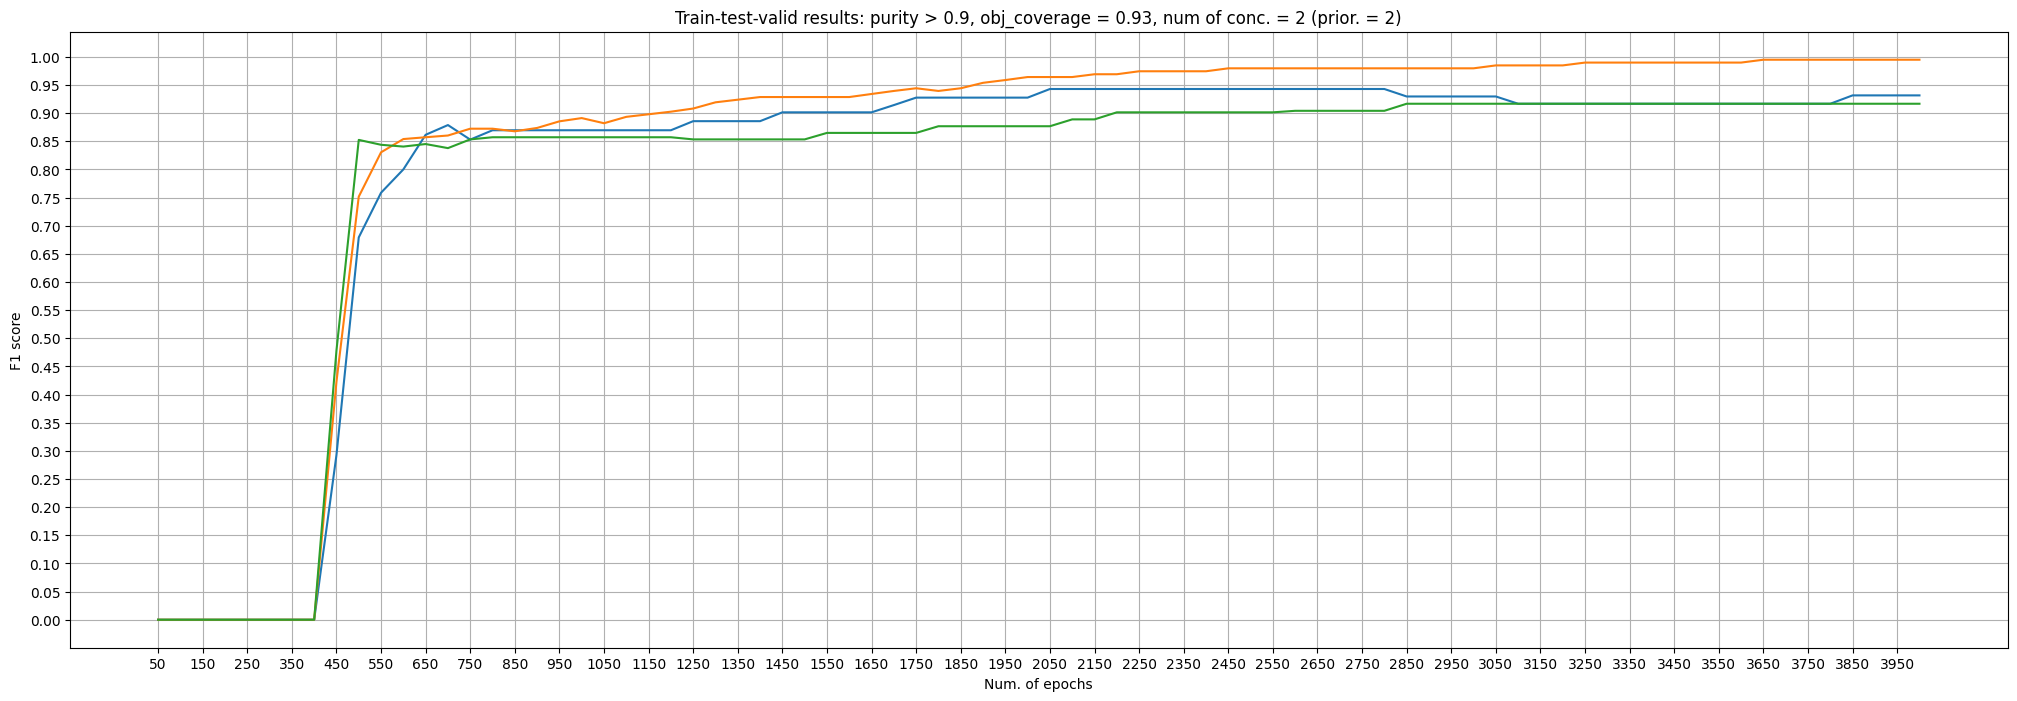

In [240]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(25,8))
plt.plot(epochs_list_,f1_list_ )
plt.plot(epochs_list_,f1_list_train_)
plt.plot(epochs_list_, f1_list_valid_)
plt.title('Train-test-valid results: purity > 0.9, obj_coverage = 0.93, num of conc. = 2 (prior. = 2)')
plt.xlabel("Num. of epochs")
plt.ylabel("F1 score")
plt.grid()
plt.xticks(np.arange(50, 4050, 100))
plt.yticks(np.arange(0, 1.05, 0.05))

### end 2 0.8

In [527]:
# making list from formal concepts
L_list_ = []
for c in L_:
  L_list_.append(c)

In [528]:
L_indices_ = []
for c in L_list_:
  L_indices_.append(L_.index(c))

In [149]:
import neural_lib58 as nl
import matplotlib as plt
coverage_i = full_list_ind[11][0]
f1_list_ = []
f1_list_train_ = []
f1_list_valid_ = []
epochs_list_ = []

res_85_3= pd.DataFrame(columns = ['cov', 'epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])

cn_ = nl.ConceptNetwork.from_lattice(L_,L_ind_used_prior[], sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
for i in range(80):
    k = 50
    print('Epoch ', k*(i+1))
    epochs_list_.append(k*(i+1))
    if i == 0:
        cn_.fit(X_train_, y_train_, k)
    else:
        cn_.fit_2(X_train_, y_train_, k)
    pred_all_ = cn_.predict(X_test_)
    pred_train_all_ = cn_.predict(X_train_)
    pred_val_all_ = cn_.predict(X_valid)
    pred_valid_ = pred_val_all_[1]
    pred_ = pred_all_[1]
    pred_train_ = pred_train_all_[1]
    

    print('score train:', f1_score(y_train_, pred_train_))
    print('score val:', f1_score(y_valid, pred_valid_))
    print('score test:', f1_score(y_test_, pred_))
    f1_list_.append(f1_score(y_test_, pred_))
    f1_list_train_.append(f1_score(y_train_, pred_train_))
    f1_list_valid_.append(f1_score(y_valid, pred_valid_))
    res_85_3.loc[len(res_85_3)] = [coverage_i, k*(i+1), f1_score(y_train_, pred_train_), f1_score(y_valid, pred_valid_), f1_score(y_test_, pred_)]

    


Epoch  50
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  100
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  150
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  200
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  250
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  300
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  350
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  400
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  450
score train: 0.3697478991596639
score val: 0.2926829268292683
score test: 0.25
Epoch  500
score train: 0.7152317880794702
score val: 0.7931034482758621
score test: 0.6274509803921569
Epoch  550
score train: 0.8121212121212121
score val: 0.8333333333333334
score test: 0.7796610169491526
Epoch  600
score train: 0.8409090909090909
score val: 0.8615384615384616
score test: 0.84375
Epoch  650
score train: 0.8695652173913043
score val: 0.8450704225352113
score test: 0.84375
Epoch  700
score train: 0.8842105263157894
sc

([<matplotlib.axis.YTick at 0x298e16240>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.55, '0.55'),
  Text(0, 0.6000000000000001, '0.60'),
  Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.75, '0.75'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.8500000000000001, '0.85'),
  Text(0, 0.9, '0.90'),
  Text(0, 0.9500000000000001, '0.95'),
  Text(0, 1.0, '1.00')])

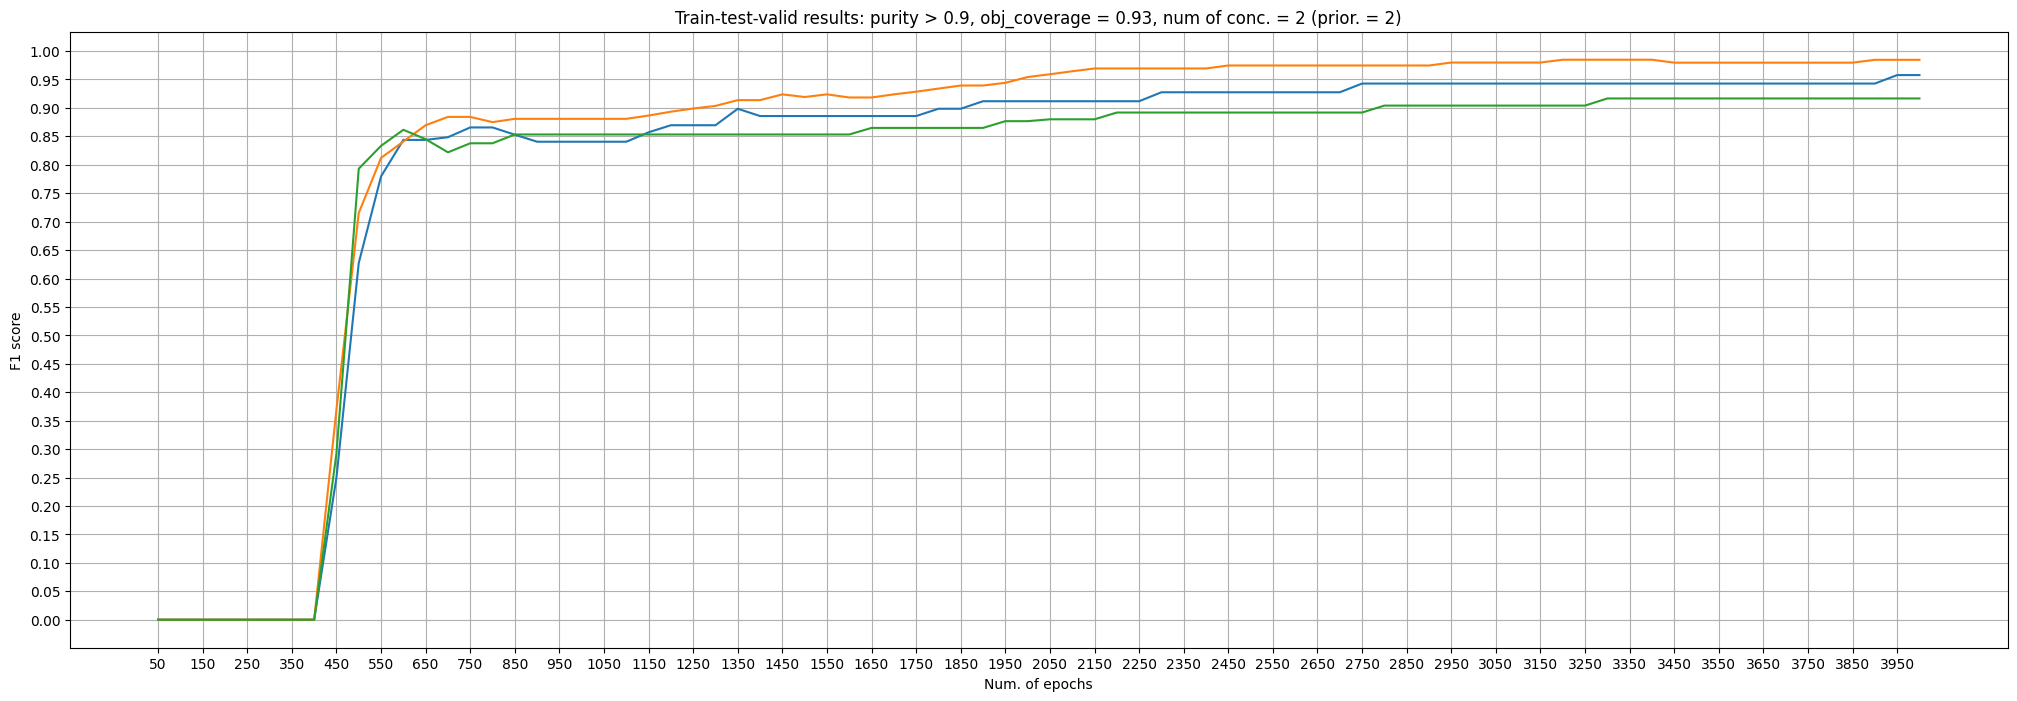

In [150]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(25,8))
plt.plot(epochs_list_,f1_list_ )
plt.plot(epochs_list_,f1_list_train_)
plt.plot(epochs_list_, f1_list_valid_)
plt.title('Train-test-valid results: purity > 0.9, obj_coverage = 0.93, num of conc. = 2 (prior. = 2)')
plt.xlabel("Num. of epochs")
plt.ylabel("F1 score")
plt.grid()
plt.xticks(np.arange(50, 4050, 100))
plt.yticks(np.arange(0, 1.05, 0.05))

In [152]:
res_85_3[res_85_3['epoch'] == 1100]

,cov,epoch,F1_score_train,F1_score_val,F1_score_test
21,0.97,1100.0,0.880829,0.853333,0.84058


## Test Check

In [ ]:
print(L_[40].intent, L_[6].intent)

In [241]:
import neural_lib58 as nl
import matplotlib as plt

f1_list = []
#f1_list_train = []
#f1_list_valid = []
#epochs_list = []

#res_90_all = pd.DataFrame(columns = ['epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])
for i in range (0,100):
    print(i)
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_, sorted(set(y_train_))) 
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_2, sorted(set(y_train_))) 
   # L_ind_3
   # cn = nl.ConceptNetwork.from_lattice(L_, L_ind_3, sorted(set(y_train_))) 
    #L_ind_used_prior[10]
    cn = nl.ConceptNetwork.from_lattice(L_, L_ind_used_prior[23], sorted(set(y_train_))) 
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_used_prior[23], sorted(set(y_train_)))
    #cn_ = nl.ConceptNetwork.from_lattice(L_,L_ind_used_prior[1], sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
    for i in range(18):
        k = 50
        #print('Epoch ', k*(i+1))
        epochs_list.append(k*(i+1))
        if i == 0:
            cn.fit(X_train_, y_train_, k)
        else:
            cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_)
   # pred_train_all = cn.predict(X_train_)
    #pred_val_all = cn.predict(X_valid)
    #pred_valid = pred_val_all[1]
    pred = pred_all[1]
    #pred_train = pred_train_all[1]
    

   # print('score train:', f1_score(y_train_, pred_train))
    #print('score val:', f1_score(y_valid, pred_valid))
    print('score test:', f1_score(y_test_, pred))
    f1_list.append(f1_score(y_test_, pred))
    #f1_list_train.append(f1_score(y_train_, pred_train))
    #f1_list_valid.append(f1_score(y_valid, pred_valid))
    #res_90_all.loc[len(res_90_all)] = [k*(i+1), f1_score(y_train_, pred_train), f1_score(y_valid, pred_valid), f1_score(y_test_, pred)]

print('Test F1 score', sum(f1_list)/100)


0
score test: 0.8695652173913043
1
score test: 0.8823529411764706
2
score test: 0.8695652173913043
3
score test: 0.8695652173913043
4
score test: 0.8823529411764706
5
score test: 0.8656716417910447
6
score test: 0.8656716417910447
7
score test: 0.8695652173913043
8
score test: 0.8823529411764706
9
score test: 0.8695652173913043
10
score test: 0.8529411764705882
11
score test: 0.8571428571428571
12
score test: 0.8695652173913043
13
score test: 0.8405797101449275
14
score test: 0.8656716417910447
15
score test: 0.8985507246376812
16
score test: 0.8695652173913043
17
score test: 0.8695652173913043
18
score test: 0.8823529411764706
19
score test: 0.8823529411764706
20
score test: 0.8529411764705882
21
score test: 0.8955223880597015
22
score test: 0.8955223880597015
23
score test: 0.835820895522388
24
score test: 0.8529411764705882
25
score test: 0.8823529411764706
26
score test: 0.8823529411764706
27
score test: 0.8571428571428571
28
score test: 0.8571428571428571
29
score test: 0.85294117

In [179]:
f1_scores_counts = pd.DataFrame(columns = ['intent', 'object coverage','F1 test'])

In [181]:
#f1_scores_counts = pd.DataFrame(columns = ['object coverage','F1 test'])
f1_scores_counts.loc[0] = [[ L_[49].intent, L_[6].intent, L_[40].intent], full_list_ind[2][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.868


In [185]:
f1_scores_counts.loc[1] = [[L_[49].intent, L_[6].intent, L_[36].intent], full_list_ind[4][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.868
1,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.842


In [189]:
f1_scores_counts.loc[2] = [[L_[49].intent, L_[6].intent, L_[34].intent], full_list_ind[5][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.868
1,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.842
2,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.869


In [193]:
f1_scores_counts.loc[3] = [[L_[49].intent, L_[6].intent, L_[29].intent], full_list_ind[6][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.868
1,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.842
2,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.869
3,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.846


In [197]:
f1_scores_counts.loc[4] = [[L_[49].intent, L_[6].intent, L_[25].intent], full_list_ind[7][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.868
1,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.842
2,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.869
3,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.846
4,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.857


In [201]:
f1_scores_counts.loc[5] = [[L_[49].intent, L_[6].intent, L_[23].intent], full_list_ind[10][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.868
1,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.842
2,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.869
3,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.846
4,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.857
5,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.858


In [205]:
f1_scores_counts.loc[6] = [[L_[49].intent, L_[6].intent, L_[21].intent], full_list_ind[11][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.868
1,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.842
2,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.869
3,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.846
4,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.857
5,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.858
6,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.855


In [210]:
f1_scores_counts.loc[7] = [[L_[49].intent, L_[6].intent, L_[18].intent], full_list_ind[12][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.868
1,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.842
2,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.869
3,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.846
4,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.857
5,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.858
6,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.855
7,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.857


In [214]:
f1_scores_counts.loc[8] = [[L_[49].intent, L_[6].intent, L_[15].intent], full_list_ind[14][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.868
1,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.842
2,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.869
3,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.846
4,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.857
5,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.858
6,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.855
7,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.857
8,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.848


In [218]:
f1_scores_counts.loc[9] = [[L_[49].intent, L_[6].intent, L_[13].intent], full_list_ind[15][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.868
1,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.842
2,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.869
3,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.846
4,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.857
5,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.858
6,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.855
7,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.857
8,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.848
9,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.853


In [222]:
f1_scores_counts.loc[10] = [[L_[49].intent, L_[6].intent, L_[10].intent], full_list_ind[17][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.868
1,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.842
2,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.869
3,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.846
4,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.857
5,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.858
6,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.855
7,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.857
8,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.848
9,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.853


In [226]:
f1_scores_counts.loc[11] = [[L_[49].intent, L_[6].intent, L_[7].intent], full_list_ind[18][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.868
1,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.842
2,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.869
3,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.846
4,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.857
5,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.858
6,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.855
7,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.857
8,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.848
9,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.853


In [230]:
f1_scores_counts.loc[12] = [[L_[49].intent, L_[6].intent, L_[5].intent], full_list_ind[20][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.868
1,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.842
2,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.869
3,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.846
4,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.857
5,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.858
6,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.855
7,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.857
8,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.848
9,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.853


In [234]:
f1_scores_counts.loc[13] = [[L_[49].intent, L_[3].intent, L_[40].intent], full_list_ind[21][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.868
1,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.842
2,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.869
3,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.846
4,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.857
5,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.858
6,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.855
7,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.857
8,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.848
9,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.853


In [238]:
f1_scores_counts.loc[14] = [[ L_[49].intent, L_[6].intent, L_[2].intent], full_list_ind[22][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.868
1,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.842
2,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.869
3,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.846
4,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.857
5,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.858
6,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.855
7,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.857
8,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.848
9,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.853


In [242]:
f1_scores_counts.loc[15] = [[L_[41].intent, L_[6].intent, L_[1].intent], full_list_ind[23][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.868
1,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.842
2,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.869
3,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.846
4,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.857
5,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.858
6,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.855
7,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.857
8,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.848
9,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.853


In [243]:
f1_scores_counts.to_csv('House_Votes_80_3.csv')

In [244]:
f1_scores_counts_2 = pd.read_csv('House_Votes_80_3.csv')
f1_scores_counts_2

,Unnamed: 0,intent,object coverage,F1 test
0,0,"[('Budget', 'Nicaragua', 'Missile', 'Synfuels'...",1.0,0.868
1,1,"[('Budget', 'Nicaragua', 'Missile', 'Synfuels'...",1.0,0.842
2,2,"[('Budget', 'Nicaragua', 'Missile', 'Synfuels'...",1.0,0.869
3,3,"[('Budget', 'Nicaragua', 'Missile', 'Synfuels'...",1.0,0.846
4,4,"[('Budget', 'Nicaragua', 'Missile', 'Synfuels'...",1.0,0.857
5,5,"[('Budget', 'Nicaragua', 'Missile', 'Synfuels'...",1.0,0.858
6,6,"[('Budget', 'Nicaragua', 'Missile', 'Synfuels'...",1.0,0.855
7,7,"[('Budget', 'Nicaragua', 'Missile', 'Synfuels'...",1.0,0.857
8,8,"[('Budget', 'Nicaragua', 'Missile', 'Synfuels'...",1.0,0.848
9,9,"[('Budget', 'Nicaragua', 'Missile', 'Synfuels'...",1.0,0.853


In [158]:
print('2', L_[49].intent, L_[6].intent, L_[40].intent)
print('4', L_[49].intent, L_[6].intent, L_[36].intent)
print('5', L_[49].intent, L_[6].intent, L_[34].intent)
print('6', L_[49].intent, L_[6].intent, L_[29].intent)
print('7', L_[49].intent, L_[6].intent, L_[25].intent)
print('10', L_[49].intent, L_[6].intent, L_[23].intent)
print('11', L_[49].intent, L_[6].intent, L_[21].intent)
print('12', L_[49].intent, L_[6].intent, L_[18].intent)
print('14', L_[49].intent, L_[6].intent, L_[15].intent)
print('15', L_[49].intent, L_[6].intent, L_[13].intent)
print('17', L_[49].intent, L_[6].intent, L_[10].intent)
print('18', L_[49].intent, L_[6].intent, L_[7].intent)
print('20', L_[49].intent, L_[6].intent, L_[5].intent)
print('21', L_[49].intent, L_[3].intent, L_[40].intent)
print('22', L_[49].intent, L_[6].intent, L_[2].intent)
print('23', L_[41].intent, L_[6].intent, L_[1].intent)

2 ('Budget', 'Nicaragua', 'Missile', 'Synfuels', 'Duty-free') ('Physician', 'Education') ('Infants', 'Synfuels', 'Duty-free')
4 ('Budget', 'Nicaragua', 'Missile', 'Synfuels', 'Duty-free') ('Physician', 'Education') ('Missile', 'Synfuels', 'Duty-free')
5 ('Budget', 'Nicaragua', 'Missile', 'Synfuels', 'Duty-free') ('Physician', 'Education') ('Infants', 'Budget')
6 ('Budget', 'Nicaragua', 'Missile', 'Synfuels', 'Duty-free') ('Physician', 'Education') ('Missile', 'Synfuels')
7 ('Budget', 'Nicaragua', 'Missile', 'Synfuels', 'Duty-free') ('Physician', 'Education') ('Infants', 'Missile')
10 ('Budget', 'Nicaragua', 'Missile', 'Synfuels', 'Duty-free') ('Physician', 'Education') ('Infants', 'Synfuels')
11 ('Budget', 'Nicaragua', 'Missile', 'Synfuels', 'Duty-free') ('Physician', 'Education') ('Nicaragua', 'Missile')
12 ('Budget', 'Nicaragua', 'Missile', 'Synfuels', 'Duty-free') ('Physician', 'Education') ('Budget',)
14 ('Budget', 'Nicaragua', 'Missile', 'Synfuels', 'Duty-free') ('Physician', 'Edu

### end 3 concepts 0.8

In [111]:
f1_scores_counts = pd.DataFrame(columns = ['intent', 'object coverage','F1 test'])

In [113]:
#f1_scores_counts = pd.DataFrame(columns = ['object coverage','F1 test'])
f1_scores_counts.loc[0] = [[L_[49].intent,L_[6].intent], full_list_ind[1][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.841


In [114]:
#f1_scores_counts.to_csv('House_Votes_80_2.csv')

In [116]:
f1_scores_counts.loc[1] = [[L_[3].intent,L_[49].intent], full_list_ind[21][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.0,0.841
1,"[(Education,), (Budget, Nicaragua, Missile, Sy...",1.0,0.844


In [118]:
f1_scores_counts.loc[2] = [[L_[2].intent,L_[49].intent], full_list_ind[22][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.00,0.841
1,"[(Education,), (Budget, Nicaragua, Missile, Sy...",1.00,0.844
2,"[(Physician,), (Budget, Nicaragua, Missile, Sy...",0.99,0.844


In [120]:
f1_scores_counts.loc[3] = [[L_[36].intent,L_[6].intent], full_list_ind[4][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.00,0.841
1,"[(Education,), (Budget, Nicaragua, Missile, Sy...",1.00,0.844
2,"[(Physician,), (Budget, Nicaragua, Missile, Sy...",0.99,0.844
3,"[(Missile, Synfuels, Duty-free), (Physician, E...",0.98,0.839


In [122]:
f1_scores_counts.loc[4] = [[L_[34].intent,L_[6].intent], full_list_ind[5][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.00,0.841
1,"[(Education,), (Budget, Nicaragua, Missile, Sy...",1.00,0.844
2,"[(Physician,), (Budget, Nicaragua, Missile, Sy...",0.99,0.844
3,"[(Missile, Synfuels, Duty-free), (Physician, E...",0.98,0.839
4,"[(Infants, Budget), (Physician, Education)]",0.98,0.838


In [124]:
f1_scores_counts.loc[5] = [[L_[40].intent,L_[6].intent], full_list_ind[2][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.00,0.841
1,"[(Education,), (Budget, Nicaragua, Missile, Sy...",1.00,0.844
2,"[(Physician,), (Budget, Nicaragua, Missile, Sy...",0.99,0.844
3,"[(Missile, Synfuels, Duty-free), (Physician, E...",0.98,0.839
4,"[(Infants, Budget), (Physician, Education)]",0.98,0.838
5,"[(Infants, Synfuels, Duty-free), (Physician, E...",0.97,0.839


In [126]:
f1_scores_counts.loc[6] = [[L_[29].intent,L_[6].intent], full_list_ind[6][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.00,0.841
1,"[(Education,), (Budget, Nicaragua, Missile, Sy...",1.00,0.844
2,"[(Physician,), (Budget, Nicaragua, Missile, Sy...",0.99,0.844
3,"[(Missile, Synfuels, Duty-free), (Physician, E...",0.98,0.839
4,"[(Infants, Budget), (Physician, Education)]",0.98,0.838
5,"[(Infants, Synfuels, Duty-free), (Physician, E...",0.97,0.839
6,"[(Missile, Synfuels), (Physician, Education)]",0.97,0.837


In [128]:
f1_scores_counts.loc[7] = [[L_[21].intent,L_[6].intent], full_list_ind[11][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.00,0.841
1,"[(Education,), (Budget, Nicaragua, Missile, Sy...",1.00,0.844
2,"[(Physician,), (Budget, Nicaragua, Missile, Sy...",0.99,0.844
3,"[(Missile, Synfuels, Duty-free), (Physician, E...",0.98,0.839
4,"[(Infants, Budget), (Physician, Education)]",0.98,0.838
5,"[(Infants, Synfuels, Duty-free), (Physician, E...",0.97,0.839
6,"[(Missile, Synfuels), (Physician, Education)]",0.97,0.837
7,"[(Nicaragua, Missile), (Physician, Education)]",0.97,0.841


In [130]:
f1_scores_counts.loc[8] = [[L_[18].intent,L_[6].intent], full_list_ind[12][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.00,0.841
1,"[(Education,), (Budget, Nicaragua, Missile, Sy...",1.00,0.844
2,"[(Physician,), (Budget, Nicaragua, Missile, Sy...",0.99,0.844
3,"[(Missile, Synfuels, Duty-free), (Physician, E...",0.98,0.839
4,"[(Infants, Budget), (Physician, Education)]",0.98,0.838
5,"[(Infants, Synfuels, Duty-free), (Physician, E...",0.97,0.839
6,"[(Missile, Synfuels), (Physician, Education)]",0.97,0.837
7,"[(Nicaragua, Missile), (Physician, Education)]",0.97,0.841
8,"[(Budget,), (Physician, Education)]",0.96,0.839


In [132]:
f1_scores_counts.loc[9] = [[L_[25].intent,L_[6].intent], full_list_ind[7][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.00,0.841
1,"[(Education,), (Budget, Nicaragua, Missile, Sy...",1.00,0.844
2,"[(Physician,), (Budget, Nicaragua, Missile, Sy...",0.99,0.844
3,"[(Missile, Synfuels, Duty-free), (Physician, E...",0.98,0.839
4,"[(Infants, Budget), (Physician, Education)]",0.98,0.838
5,"[(Infants, Synfuels, Duty-free), (Physician, E...",0.97,0.839
6,"[(Missile, Synfuels), (Physician, Education)]",0.97,0.837
7,"[(Nicaragua, Missile), (Physician, Education)]",0.97,0.841
8,"[(Budget,), (Physician, Education)]",0.96,0.839
9,"[(Infants, Missile), (Physician, Education)]",0.95,0.838


In [134]:
f1_scores_counts.loc[10] = [[L_[23].intent,L_[6].intent], full_list_ind[10][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.00,0.841
1,"[(Education,), (Budget, Nicaragua, Missile, Sy...",1.00,0.844
2,"[(Physician,), (Budget, Nicaragua, Missile, Sy...",0.99,0.844
3,"[(Missile, Synfuels, Duty-free), (Physician, E...",0.98,0.839
4,"[(Infants, Budget), (Physician, Education)]",0.98,0.838
5,"[(Infants, Synfuels, Duty-free), (Physician, E...",0.97,0.839
6,"[(Missile, Synfuels), (Physician, Education)]",0.97,0.837
7,"[(Nicaragua, Missile), (Physician, Education)]",0.97,0.841
8,"[(Budget,), (Physician, Education)]",0.96,0.839
9,"[(Infants, Missile), (Physician, Education)]",0.95,0.838


In [136]:
f1_scores_counts.loc[11] = [[L_[15].intent,L_[6].intent], full_list_ind[14][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.00,0.841
1,"[(Education,), (Budget, Nicaragua, Missile, Sy...",1.00,0.844
2,"[(Physician,), (Budget, Nicaragua, Missile, Sy...",0.99,0.844
3,"[(Missile, Synfuels, Duty-free), (Physician, E...",0.98,0.839
4,"[(Infants, Budget), (Physician, Education)]",0.98,0.838
5,"[(Infants, Synfuels, Duty-free), (Physician, E...",0.97,0.839
6,"[(Missile, Synfuels), (Physician, Education)]",0.97,0.837
7,"[(Nicaragua, Missile), (Physician, Education)]",0.97,0.841
8,"[(Budget,), (Physician, Education)]",0.96,0.839
9,"[(Infants, Missile), (Physician, Education)]",0.95,0.838


In [138]:
f1_scores_counts.loc[12] = [[L_[10].intent,L_[6].intent], full_list_ind[17][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.00,0.841
1,"[(Education,), (Budget, Nicaragua, Missile, Sy...",1.00,0.844
2,"[(Physician,), (Budget, Nicaragua, Missile, Sy...",0.99,0.844
3,"[(Missile, Synfuels, Duty-free), (Physician, E...",0.98,0.839
4,"[(Infants, Budget), (Physician, Education)]",0.98,0.838
5,"[(Infants, Synfuels, Duty-free), (Physician, E...",0.97,0.839
6,"[(Missile, Synfuels), (Physician, Education)]",0.97,0.837
7,"[(Nicaragua, Missile), (Physician, Education)]",0.97,0.841
8,"[(Budget,), (Physician, Education)]",0.96,0.839
9,"[(Infants, Missile), (Physician, Education)]",0.95,0.838


In [140]:
f1_scores_counts.loc[13] = [[L_[13].intent,L_[6].intent], full_list_ind[15][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.00,0.841
1,"[(Education,), (Budget, Nicaragua, Missile, Sy...",1.00,0.844
2,"[(Physician,), (Budget, Nicaragua, Missile, Sy...",0.99,0.844
3,"[(Missile, Synfuels, Duty-free), (Physician, E...",0.98,0.839
4,"[(Infants, Budget), (Physician, Education)]",0.98,0.838
5,"[(Infants, Synfuels, Duty-free), (Physician, E...",0.97,0.839
6,"[(Missile, Synfuels), (Physician, Education)]",0.97,0.837
7,"[(Nicaragua, Missile), (Physician, Education)]",0.97,0.841
8,"[(Budget,), (Physician, Education)]",0.96,0.839
9,"[(Infants, Missile), (Physician, Education)]",0.95,0.838


In [142]:
f1_scores_counts.loc[14] = [[L_[7].intent,L_[6].intent], full_list_ind[18][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.00,0.841
1,"[(Education,), (Budget, Nicaragua, Missile, Sy...",1.00,0.844
2,"[(Physician,), (Budget, Nicaragua, Missile, Sy...",0.99,0.844
3,"[(Missile, Synfuels, Duty-free), (Physician, E...",0.98,0.839
4,"[(Infants, Budget), (Physician, Education)]",0.98,0.838
5,"[(Infants, Synfuels, Duty-free), (Physician, E...",0.97,0.839
6,"[(Missile, Synfuels), (Physician, Education)]",0.97,0.837
7,"[(Nicaragua, Missile), (Physician, Education)]",0.97,0.841
8,"[(Budget,), (Physician, Education)]",0.96,0.839
9,"[(Infants, Missile), (Physician, Education)]",0.95,0.838


In [144]:
f1_scores_counts.loc[15] = [[L_[5].intent,L_[6].intent], full_list_ind[20][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.00,0.841
1,"[(Education,), (Budget, Nicaragua, Missile, Sy...",1.00,0.844
2,"[(Physician,), (Budget, Nicaragua, Missile, Sy...",0.99,0.844
3,"[(Missile, Synfuels, Duty-free), (Physician, E...",0.98,0.839
4,"[(Infants, Budget), (Physician, Education)]",0.98,0.838
5,"[(Infants, Synfuels, Duty-free), (Physician, E...",0.97,0.839
6,"[(Missile, Synfuels), (Physician, Education)]",0.97,0.837
7,"[(Nicaragua, Missile), (Physician, Education)]",0.97,0.841
8,"[(Budget,), (Physician, Education)]",0.96,0.839
9,"[(Infants, Missile), (Physician, Education)]",0.95,0.838


In [146]:
f1_scores_counts.loc[16] = [[L_[1].intent,L_[41].intent], full_list_ind[23][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Budget, Nicaragua, Missile, Synfuels, Duty-f...",1.00,0.841
1,"[(Education,), (Budget, Nicaragua, Missile, Sy...",1.00,0.844
2,"[(Physician,), (Budget, Nicaragua, Missile, Sy...",0.99,0.844
3,"[(Missile, Synfuels, Duty-free), (Physician, E...",0.98,0.839
4,"[(Infants, Budget), (Physician, Education)]",0.98,0.838
5,"[(Infants, Synfuels, Duty-free), (Physician, E...",0.97,0.839
6,"[(Missile, Synfuels), (Physician, Education)]",0.97,0.837
7,"[(Nicaragua, Missile), (Physician, Education)]",0.97,0.841
8,"[(Budget,), (Physician, Education)]",0.96,0.839
9,"[(Infants, Missile), (Physician, Education)]",0.95,0.838


In [153]:
f1_scores_counts.to_csv('House_Votes_80_2.csv')

In [154]:
f1_scores_counts_2 = pd.read_csv('House_Votes_80_2.csv')
f1_scores_counts_2

,Unnamed: 0,intent,object coverage,F1 test
0,0,"[('Budget', 'Nicaragua', 'Missile', 'Synfuels'...",1.00,0.841
1,1,"[('Education',), ('Budget', 'Nicaragua', 'Miss...",1.00,0.844
2,2,"[('Physician',), ('Budget', 'Nicaragua', 'Miss...",0.99,0.844
3,3,"[('Missile', 'Synfuels', 'Duty-free'), ('Physi...",0.98,0.839
4,4,"[('Infants', 'Budget'), ('Physician', 'Educati...",0.98,0.838
5,5,"[('Infants', 'Synfuels', 'Duty-free'), ('Physi...",0.97,0.839
6,6,"[('Missile', 'Synfuels'), ('Physician', 'Educa...",0.97,0.837
7,7,"[('Nicaragua', 'Missile'), ('Physician', 'Educ...",0.97,0.841
8,8,"[('Budget',), ('Physician', 'Education')]",0.96,0.839
9,9,"[('Infants', 'Missile'), ('Physician', 'Educat...",0.95,0.838


In [416]:
res_85_1.to_csv('House_Votes_85_1.csv')
res_85_2.to_csv('House_Votes_85_2(2).csv')
res_85_3.to_csv('House_Votes_85_3.csv')

## End of test section

#### 4 concepts start

In [278]:
n = 4
pur_ = 0.85
sorted_cov = sorted(cov_conc_one_sided[pur_])

t = count_pur_one_sided[pur_]


conc_list_ = {}
L_ind_used_prior = {}
full_list_ind = {}

# i -> priority
for i in range(1,t+1):
    for c in pur_conc_all_one_sided[pur_]:
        if c[2] == sorted_cov[-i]:
            first_c = c
            break

    list_param = []
    conc_prior = []
    max_cov = set(first_c[0].extent)
    chosen1 = first_c
  #  print(len(max_cov))

    for conc in pur_conc_all_one_sided[pur_]:
        if len(max_cov) < len(set(first_c[0].extent).union(set(conc[0].extent))):
          #  print(len(set(conc[0].extent)))
            cover_un1 = round(len(set(first_c[0].extent).union(set(conc[0].extent)))/len(y_train_),2)
            #print(cover_un1)
            max_cov = set(first_c[0].extent).union(set(conc[0].extent))
            chosen1 = conc
    max_cov2 = max_cov
            
            
 #   print(len(max_cov), chosen[1], chosen[2])


    conc_prior.append(first_c)
    conc_prior.append(chosen1)

    for conc in pur_conc_all_one_sided[pur_]:
        if len(max_cov2) <=len(max_cov.union(set(conc[0].extent))):
          #  print(len(set(conc[0].extent)))
            cover_un2 = round(len((max_cov).union(set(conc[0].extent)))/len(y_train_),2)
            #print(cover_un2)
            max_cov2 = max_cov.union(set(conc[0].extent))
            chosen2 = conc
            
    conc_prior.append(chosen2)

    max_cov3 = max_cov

    for conc in pur_conc_all_one_sided[pur_]:
        if len(max_cov3) <=len(max_cov2.union(set(conc[0].extent))):
          #  print(len(set(conc[0].extent)))
            cover_un3 = round(len((max_cov2).union(set(conc[0].extent)))/len(y_train_),2)
            #print(cover_un2)
            max_cov3 = max_cov2.union(set(conc[0].extent))
            chosen3 = conc
    
    conc_prior.append(chosen3)    
        
    list_param.append(conc_prior)
    list_param.append(cover_un2)
    conc_list_[i] = list_param
   # print(conc_list_)

    L_ind_used_prior[i] = []
    full_list_ind[i] = [] 
    full_list_ind[i].append(cover_un2)
    for c in conc_prior:
        L_ind_used_prior[i].append(L_.index(c[0]))
    full_list_ind[i].append( L_ind_used_prior[i])
print(full_list_ind)

{1: [0.99, [29, 2, 18, 19]], 2: [0.98, [21, 2, 13, 18]], 3: [0.99, [18, 2, 29, 19]], 4: [0.99, [18, 2, 29, 19]], 5: [0.99, [13, 2, 18, 29]], 6: [0.99, [13, 2, 18, 29]], 7: [0.97, [10, 2, 18, 13]], 8: [0.97, [5, 2, 18, 29]], 9: [0.99, [2, 29, 18, 19]], 10: [0.97, [1, 19, 2, 18]]}


### Baseline

In [279]:
import neural_lib58 as nl
import matplotlib as plt
coverage_i = full_list_ind[4][0]
f1_list_ = []
f1_list_train_ = []
f1_list_valid_ = []
epochs_list_ = []

res_85_1_4= pd.DataFrame(columns = ['cov', 'epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])

cn_ = nl.ConceptNetwork.from_lattice(L_,L_ind_used_prior[1], sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
for i in range(80):
    k = 50
    print('Epoch ', k*(i+1))
    epochs_list_.append(k*(i+1))
    if i == 0:
        cn_.fit(X_train_, y_train_, k)
    else:
        cn_.fit_2(X_train_, y_train_, k)
    pred_all_ = cn_.predict(X_test_)
    pred_train_all_ = cn_.predict(X_train_)
    pred_val_all_ = cn_.predict(X_valid)
    pred_valid_ = pred_val_all_[1]
    pred_ = pred_all_[1]
    pred_train_ = pred_train_all_[1]
    

    print('score train:', f1_score(y_train_, pred_train_))
    print('score val:', f1_score(y_valid, pred_valid_))
    print('score test:', f1_score(y_test_, pred_))
    f1_list_.append(f1_score(y_test_, pred_))
    f1_list_train_.append(f1_score(y_train_, pred_train_))
    f1_list_valid_.append(f1_score(y_valid, pred_valid_))
    res_90_4_4.loc[len(res_90_4_4)] = [coverage_i, k*(i+1), f1_score(y_train_, pred_train_), f1_score(y_valid, pred_valid_), f1_score(y_test_, pred_)]

    


Epoch  50
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  100
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  150
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  200
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  250
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  300
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  350
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  400
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  450
score train: 0.49612403100775193
score val: 0.6
score test: 0.5306122448979592
Epoch  500
score train: 0.75
score val: 0.8253968253968254
score test: 0.7368421052631579
Epoch  550
score train: 0.8160919540229885
score val: 0.8115942028985508
score test: 0.7333333333333333
Epoch  600
score train: 0.8524590163934426
score val: 0.8055555555555556
score test: 0.7936507936507936
Epoch  650
score train: 0.8494623655913979
score val: 0.821917808219178
score test: 0.8125
Epoch  700
score train: 0.8571428571428571
score v

([<matplotlib.axis.YTick at 0x298875490>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.55, '0.55'),
  Text(0, 0.6000000000000001, '0.60'),
  Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.75, '0.75'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.8500000000000001, '0.85'),
  Text(0, 0.9, '0.90'),
  Text(0, 0.9500000000000001, '0.95'),
  Text(0, 1.0, '1.00')])

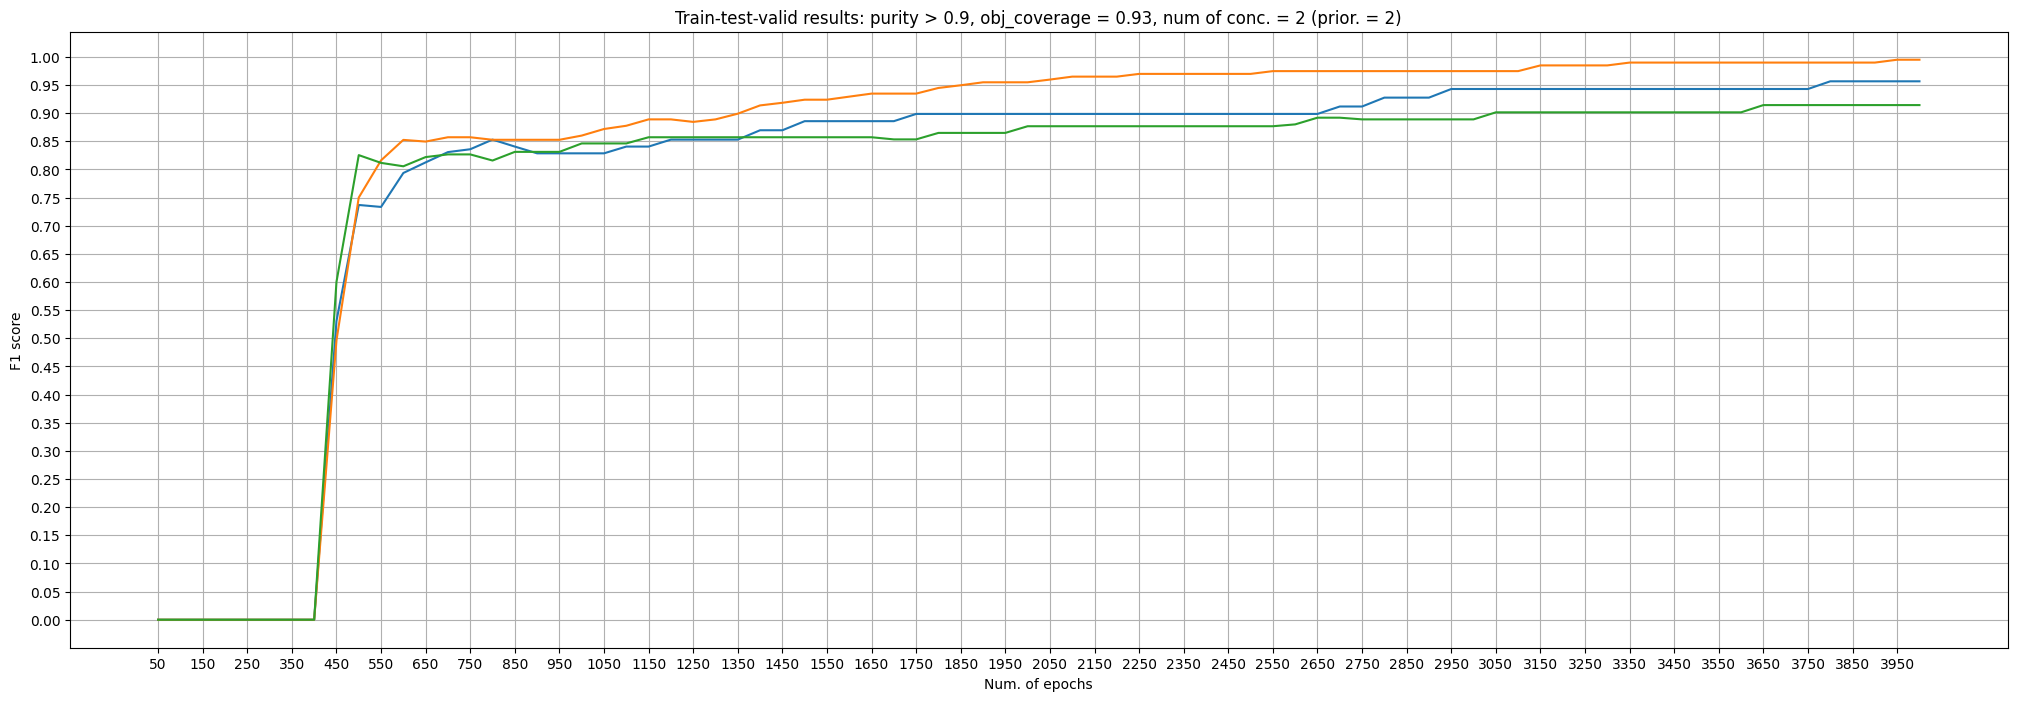

In [280]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(25,8))
plt.plot(epochs_list_,f1_list_ )
plt.plot(epochs_list_,f1_list_train_)
plt.plot(epochs_list_, f1_list_valid_)
plt.title('Train-test-valid results: purity > 0.9, obj_coverage = 0.93, num of conc. = 2 (prior. = 2)')
plt.xlabel("Num. of epochs")
plt.ylabel("F1 score")
plt.grid()
plt.xticks(np.arange(50, 4050, 100))
plt.yticks(np.arange(0, 1.05, 0.05))

## Test

In [292]:
import neural_lib58 as nl
import matplotlib as plt

f1_list = []
#f1_list_train = []
#f1_list_valid = []
#epochs_list = []

#res_90_all = pd.DataFrame(columns = ['epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])
for i in range (0,100):
    print(i)
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_, sorted(set(y_train_))) 
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_2, sorted(set(y_train_))) 
   # L_ind_3
   # cn = nl.ConceptNetwork.from_lattice(L_, L_ind_3, sorted(set(y_train_))) 
    #L_ind_used_prior[10]
    cn = nl.ConceptNetwork.from_lattice(L_, L_ind_used_prior[10], sorted(set(y_train_))) 
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_used_prior[23], sorted(set(y_train_)))
    #cn_ = nl.ConceptNetwork.from_lattice(L_,L_ind_used_prior[1], sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
    for i in range(20):
        k = 50
        #print('Epoch ', k*(i+1))
        epochs_list.append(k*(i+1))
        if i == 0:
            cn.fit(X_train_, y_train_, k)
        else:
            cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_)
   # pred_train_all = cn.predict(X_train_)
    #pred_val_all = cn.predict(X_valid)
    #pred_valid = pred_val_all[1]
    pred = pred_all[1]
    #pred_train = pred_train_all[1]
    

   # print('score train:', f1_score(y_train_, pred_train))
    #print('score val:', f1_score(y_valid, pred_valid))
    print('score test:', f1_score(y_test_, pred))
    f1_list.append(f1_score(y_test_, pred))
    #f1_list_train.append(f1_score(y_train_, pred_train))
    #f1_list_valid.append(f1_score(y_valid, pred_valid))
    #res_90_all.loc[len(res_90_all)] = [k*(i+1), f1_score(y_train_, pred_train), f1_score(y_valid, pred_valid), f1_score(y_test_, pred)]

print('Test F1 score', sum(f1_list)/100)


0
score test: 0.8285714285714286
1
score test: 0.8571428571428571
2
score test: 0.8405797101449275
3
score test: 0.8450704225352113
4
score test: 0.8611111111111112
5
score test: 0.8285714285714286
6
score test: 0.8285714285714286
7
score test: 0.8285714285714286
8
score test: 0.8285714285714286
9
score test: 0.8285714285714286
10
score test: 0.8405797101449275
11
score test: 0.8571428571428571
12
score test: 0.8285714285714286
13
score test: 0.8405797101449275
14
score test: 0.8405797101449275
15
score test: 0.8405797101449275
16
score test: 0.8285714285714286
17
score test: 0.8450704225352113
18
score test: 0.8285714285714286
19
score test: 0.8285714285714286
20
score test: 0.8571428571428571
21
score test: 0.8857142857142857
22
score test: 0.8405797101449275
23
score test: 0.8285714285714286
24
score test: 0.8571428571428571
25
score test: 0.8285714285714286
26
score test: 0.8405797101449275
27
score test: 0.8285714285714286
28
score test: 0.8529411764705882
29
score test: 0.8529411

In [ ]:
print('1', L_[21].intent, L_[2].intent, L_[18].intent,  L_[5].intent)
print('3', L_[14].intent, L_[2].intent, L_[18].intent,  L_[5].intent)
print('4', L_[10].intent, L_[2].intent, L_[18].intent,  L_[5].intent)

In [ ]:

print('1', L_[29].intent, L_[2].intent, L_[18].intent,  L_[19].intent)
print('5', L_[13].intent, L_[2].intent, L_[18].intent,  L_[29].intent)
print('2', L_[21].intent, L_[2].intent, L_[13].intent,  L_[18].intent)
print('7', L_[10].intent, L_[2].intent, L_[18].intent,  L_[13].intent)
print('8', L_[5].intent, L_[2].intent, L_[18].intent,  L_[29].intent)
print('10', L_[1].intent, L_[19].intent, L_[2].intent,  L_[18].intent)


In [282]:
f1_scores_counts = pd.DataFrame(columns = ['intent', 'object coverage','F1 test'])

In [283]:
#f1_scores_counts = pd.DataFrame(columns = ['object coverage','F1 test'])
f1_scores_counts.loc[0] = [[ L_[21].intent, L_[2].intent, L_[18].intent,  L_[5].intent], full_list_ind[1][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Nicaragua, Missile), (Physician,), (Budget,)...",0.99,0.843


In [285]:
#f1_scores_counts = pd.DataFrame(columns = ['object coverage','F1 test'])
f1_scores_counts.loc[1] = [[L_[14].intent, L_[2].intent, L_[18].intent,  L_[5].intent], full_list_ind[5][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Nicaragua, Missile), (Physician,), (Budget,)...",0.99,0.843
1,"[(Nicaragua,), (Physician,), (Budget,), (Duty-...",0.99,0.861


In [287]:
#f1_scores_counts = pd.DataFrame(columns = ['object coverage','F1 test'])
f1_scores_counts.loc[2] = [[L_[10].intent, L_[2].intent, L_[18].intent,  L_[5].intent], full_list_ind[2][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Nicaragua, Missile), (Physician,), (Budget,)...",0.99,0.843
1,"[(Nicaragua,), (Physician,), (Budget,), (Duty-...",0.99,0.861
2,"[(Missile,), (Physician,), (Budget,), (Duty-fr...",0.98,0.844


In [276]:
f1_scores_counts.to_csv('House_Votes_85_4.csv')

In [277]:
f2_scores_counts.read('House_Votes_85_4.csv')
f2_scores_counts

NameError: name 'f2_scores_counts' is not defined

In [289]:
#f1_scores_counts = pd.DataFrame(columns = ['object coverage','F1 test'])
f1_scores_counts.loc[3] = [[L_[10].intent, L_[2].intent, L_[18].intent,  L_[13].intent], full_list_ind[7][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Nicaragua, Missile), (Physician,), (Budget,)...",0.99,0.843
1,"[(Nicaragua,), (Physician,), (Budget,), (Duty-...",0.99,0.861
2,"[(Missile,), (Physician,), (Budget,), (Duty-fr...",0.98,0.844
3,"[(Missile,), (Physician,), (Budget,), (Synfuel...",0.97,0.841


In [291]:
#f1_scores_counts = pd.DataFrame(columns = ['object coverage','F1 test'])
f1_scores_counts.loc[4] = [[ L_[5].intent, L_[2].intent, L_[18].intent,  L_[29].intent], full_list_ind[8][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Nicaragua, Missile), (Physician,), (Budget,)...",0.99,0.843
1,"[(Nicaragua,), (Physician,), (Budget,), (Duty-...",0.99,0.861
2,"[(Missile,), (Physician,), (Budget,), (Duty-fr...",0.98,0.844
3,"[(Missile,), (Physician,), (Budget,), (Synfuel...",0.97,0.841
4,"[(Duty-free,), (Physician,), (Budget,), (Missi...",0.97,0.840


In [293]:
#f1_scores_counts = pd.DataFrame(columns = ['object coverage','F1 test'])
f1_scores_counts.loc[5] = [[L_[1].intent, L_[19].intent, L_[2].intent,  L_[18].intent], full_list_ind[10][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Nicaragua, Missile), (Physician,), (Budget,)...",0.99,0.843
1,"[(Nicaragua,), (Physician,), (Budget,), (Duty-...",0.99,0.861
2,"[(Missile,), (Physician,), (Budget,), (Duty-fr...",0.98,0.844
3,"[(Missile,), (Physician,), (Budget,), (Synfuel...",0.97,0.841
4,"[(Duty-free,), (Physician,), (Budget,), (Missi...",0.97,0.840
5,"[(Synfuels,), (Missile, Duty-free), (Physician...",0.97,0.841


In [294]:
f1_scores_counts.to_csv('House_Votes_85_4.csv')

In [ ]:
f2_scores_counts = pd.read('House_Votes_85_4.csv')
f2_scores_counts

### >= 0.9 purity, 4 concepts

### >= 0.85 purity, 4 concepts

#### 4 concepts end

In [721]:
vis = LineVizNx(node_label_font_size=14, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn_.attributes))+'\n\n')
edge_weights = cn_.edge_weights_from_network()

In [722]:
descr = {'Synfuels', 'Duty-free', 'Missile'}

traced = cn_.trace_description(descr, include_targets=False)

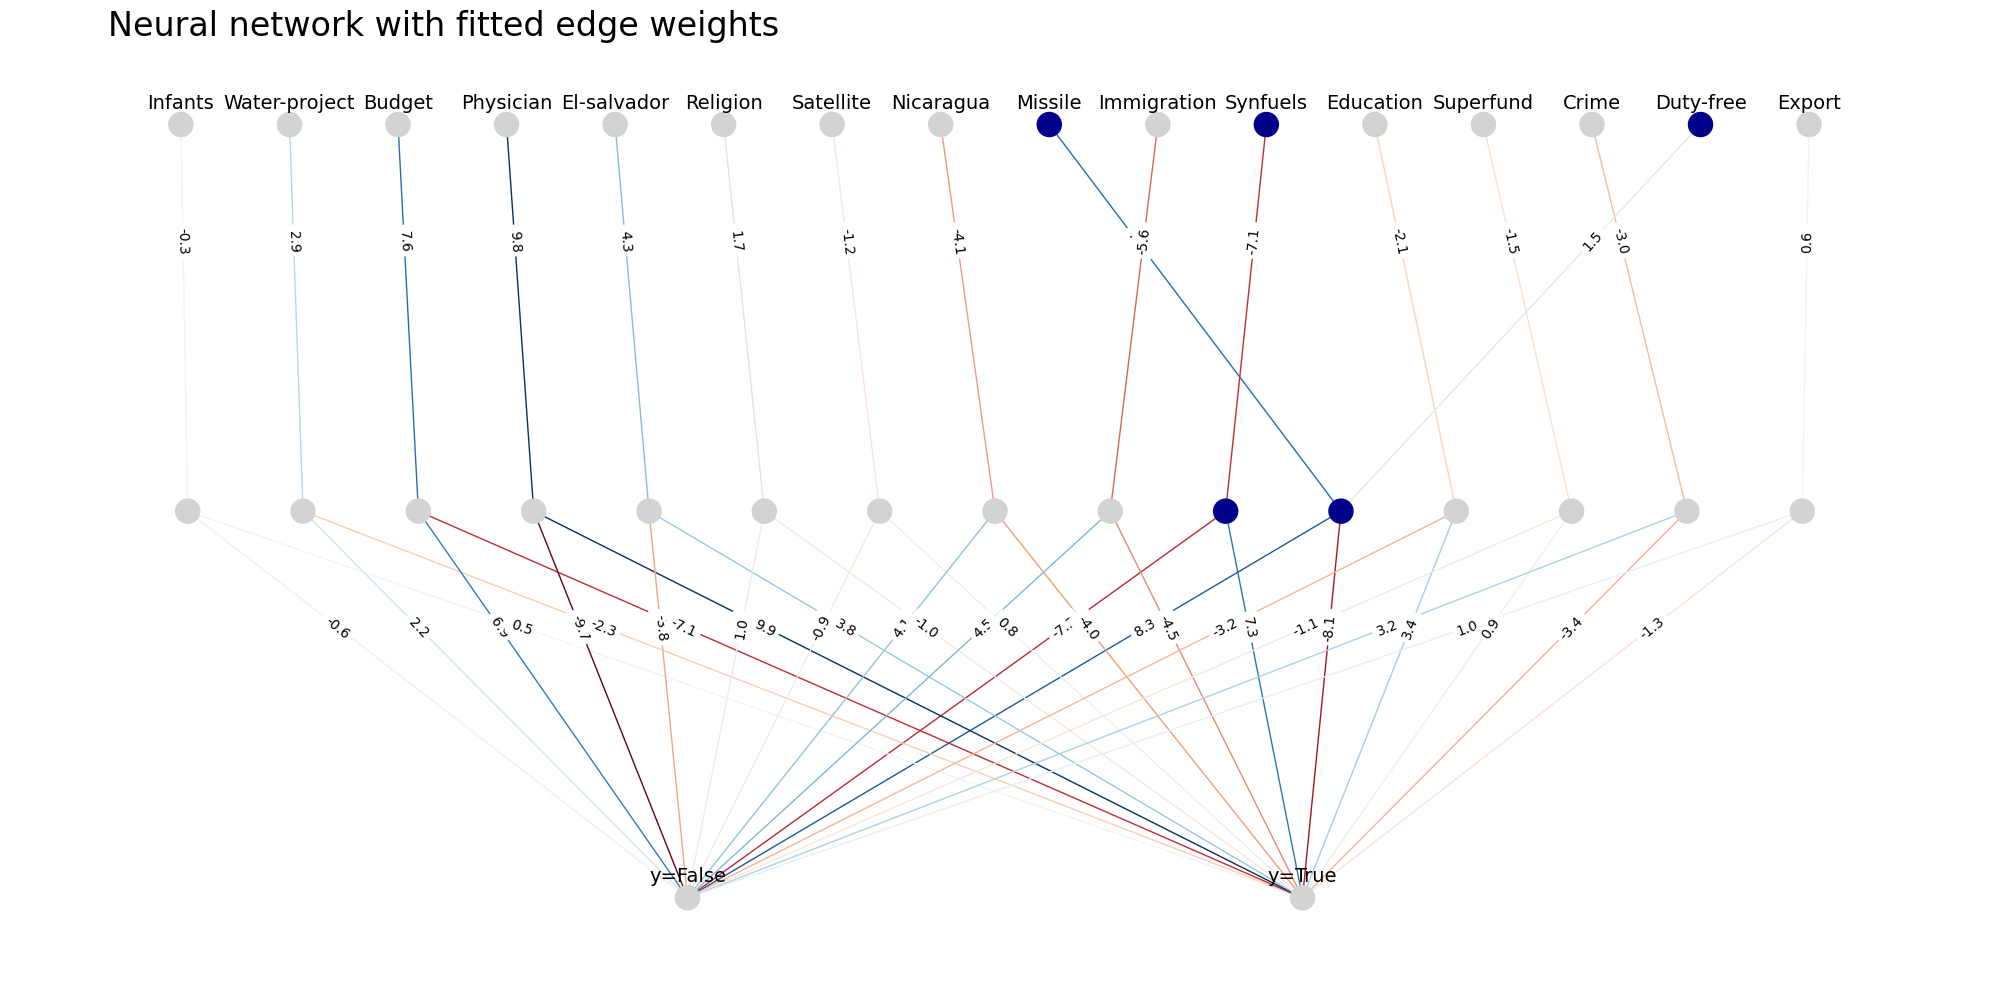

In [534]:
import networkx as nx

fig, ax = plt.subplots(figsize=(20,10))

vis.draw_poset(
    cn_.poset, ax=ax, 
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn_.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn_.poset))],
    edge_color=[edge_weights[edge] for edge in cn_.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,
)
nx.draw_networkx_edge_labels(cn_.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, x=0.05, loc='left')
plt.tight_layout()
plt.subplots_adjust()
#plt.savef

#### Choosing 3 concepts with maximal union coverage with purity above 0.9

In [156]:
n = 3
pur_ = 0.8
sorted_cov = sorted(cov_conc_one_sided[pur_])

t = count_pur_one_sided[pur_]


conc_list_ = {}
L_ind_used_prior = {}
full_list_ind = {}

# i -> priority
for i in range(1,t+1):
    for c in pur_conc_all_one_sided[pur_]:
        if c[2] == sorted_cov[-i]:
            first_c = c
            break

    list_param = []
    conc_prior = []
    max_cov = set(first_c[0].extent)
    chosen1 = first_c
  #  print(len(max_cov))

    for conc in pur_conc_all_one_sided[pur_]:
        if len(max_cov) < len(set(first_c[0].extent).union(set(conc[0].extent))):
          #  print(len(set(conc[0].extent)))
            cover_un1 = round(len(set(first_c[0].extent).union(set(conc[0].extent)))/len(y_train_),2)
            print(cover_un1)
            max_cov = set(first_c[0].extent).union(set(conc[0].extent))
            chosen1 = conc
    max_cov2 = max_cov
            
            
 #   print(len(max_cov), chosen[1], chosen[2])


    conc_prior.append(first_c)
    conc_prior.append(chosen1)

    for conc in pur_conc_all_one_sided[pur_]:
        if len(max_cov2) <=len(max_cov.union(set(conc[0].extent))):
          #  print(len(set(conc[0].extent)))
            cover_un2 = round(len((max_cov).union(set(conc[0].extent)))/len(y_train_),2)
            #print(cover_un2)
            max_cov2 = max_cov.union(set(conc[0].extent))
            chosen2 = conc
    conc_prior.append(chosen2)
        
        
    list_param.append(conc_prior)
    list_param.append(cover_un2)
    conc_list_[i] = list_param
   # print(conc_list_)

    L_ind_used_prior[i] = []
    full_list_ind[i] = [] 
    full_list_ind[i].append(cover_un2)
    for c in conc_prior:
        L_ind_used_prior[i].append(L_.index(c[0]))
    full_list_ind[i].append( L_ind_used_prior[i])
print(full_list_ind)

0.99
1.0
1.0
0.96
0.97
0.96
0.97
0.97
0.98
0.76
0.96
0.97
0.98
0.96
0.97
0.74
0.93
0.94
0.95
0.74
0.93
0.94
0.95
0.74
0.93
0.94
0.95
0.9
0.92
0.7
0.94
0.95
0.97
0.7
0.93
0.96
0.7
0.93
0.96
0.72
0.89
0.9
0.92
0.86
0.88
0.86
0.88
0.67
0.88
0.88
0.91
0.64
0.78
0.8
0.82
0.69
0.82
0.91
0.95
0.96
0.97
0.97
0.98
1.0
1.0
0.58
0.79
0.79
0.82
0.66
0.79
0.8
0.88
0.92
0.93
0.95
0.97
0.99
1.0
0.66
0.79
0.88
0.92
0.93
0.94
0.96
0.96
0.97
0.98
0.99
0.66
0.69
0.72
0.74
0.76
0.78
{1: [1.0, [49, 6, 49]], 2: [1.0, [40, 6, 49]], 3: [1.0, [40, 6, 49]], 4: [1.0, [36, 6, 49]], 5: [1.0, [34, 6, 49]], 6: [1.0, [29, 6, 49]], 7: [1.0, [25, 6, 49]], 8: [1.0, [25, 6, 49]], 9: [1.0, [25, 6, 49]], 10: [1.0, [23, 6, 49]], 11: [1.0, [21, 6, 49]], 12: [1.0, [18, 6, 49]], 13: [1.0, [18, 6, 49]], 14: [1.0, [15, 6, 49]], 15: [1.0, [13, 6, 49]], 16: [1.0, [13, 6, 49]], 17: [1.0, [10, 6, 49]], 18: [1.0, [7, 6, 49]], 19: [1.0, [6, 49, 49]], 20: [1.0, [5, 6, 49]], 21: [1.0, [3, 49, 40]], 22: [1.0, [2, 49, 6]], 23: [1.0, [1, 4

### 0.8 3 concepts

In [157]:
print('2', L_[49].intent, L_[6].intent, L_[40].intent)
print('4', L_[49].intent, L_[6].intent, L_[36].intent)
print('5', L_[49].intent, L_[6].intent, L_[34].intent)
print('6', L_[49].intent, L_[6].intent, L_[29].intent)
print('7', L_[49].intent, L_[6].intent, L_[25].intent)
print('10', L_[49].intent, L_[6].intent, L_[23].intent)
print('11', L_[49].intent, L_[6].intent, L_[21].intent)
print('12', L_[49].intent, L_[6].intent, L_[18].intent)
print('14', L_[49].intent, L_[6].intent, L_[15].intent)
print('15', L_[49].intent, L_[6].intent, L_[13].intent)
print('17', L_[49].intent, L_[6].intent, L_[10].intent)
print('18', L_[49].intent, L_[6].intent, L_[7].intent)
print('20', L_[49].intent, L_[6].intent, L_[5].intent)
print('21', L_[49].intent, L_[3].intent, L_[40].intent)
print('22', L_[49].intent, L_[6].intent, L_[2].intent)
print('23', L_[41].intent, L_[6].intent, L_[1].intent)

2 ('Budget', 'Nicaragua', 'Missile', 'Synfuels', 'Duty-free') ('Physician', 'Education') ('Infants', 'Synfuels', 'Duty-free')
4 ('Budget', 'Nicaragua', 'Missile', 'Synfuels', 'Duty-free') ('Physician', 'Education') ('Missile', 'Synfuels', 'Duty-free')
5 ('Budget', 'Nicaragua', 'Missile', 'Synfuels', 'Duty-free') ('Physician', 'Education') ('Infants', 'Budget')
6 ('Budget', 'Nicaragua', 'Missile', 'Synfuels', 'Duty-free') ('Physician', 'Education') ('Missile', 'Synfuels')
7 ('Budget', 'Nicaragua', 'Missile', 'Synfuels', 'Duty-free') ('Physician', 'Education') ('Infants', 'Missile')
10 ('Budget', 'Nicaragua', 'Missile', 'Synfuels', 'Duty-free') ('Physician', 'Education') ('Infants', 'Synfuels')
11 ('Budget', 'Nicaragua', 'Missile', 'Synfuels', 'Duty-free') ('Physician', 'Education') ('Nicaragua', 'Missile')
12 ('Budget', 'Nicaragua', 'Missile', 'Synfuels', 'Duty-free') ('Physician', 'Education') ('Budget',)
14 ('Budget', 'Nicaragua', 'Missile', 'Synfuels', 'Duty-free') ('Physician', 'Edu

In [394]:
len(((set(L_[5].extent)).union(set(L_[2].extent))).union(set(L_[18].extent)))/len(y_train_)

0.972972972972973

In [433]:
print(L_[2].intent)
print(L_[10].intent)
print(L_[13].intent)

('Physician',)
('Missile',)
('Synfuels', 'Duty-free')


In [442]:
import neural_lib58 as nl
import matplotlib as plt
coverage_i = full_list_ind[10][0]
f1_list_ = []
f1_list_train_ = []
f1_list_valid_ = []
epochs_list_ = []

res_85_4_3= pd.DataFrame(columns = ['cov', 'epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])

cn_ = nl.ConceptNetwork.from_lattice(L_,L_ind_used_prior[10], sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
for i in range(40):
    k = 50
    print('Epoch ', k*(i+1))
    epochs_list_.append(k*(i+1))
    if i == 0:
        cn_.fit(X_train_, y_train_, k)
    else:
        cn_.fit_2(X_train_, y_train_, k)
    pred_all_ = cn_.predict(X_test_)
    pred_train_all_ = cn_.predict(X_train_)
    pred_val_all_ = cn_.predict(X_valid)
    pred_valid_ = pred_val_all_[1]
    pred_ = pred_all_[1]
    pred_train_ = pred_train_all_[1]
    

    print('score train:', f1_score(y_train_, pred_train_))
    print('score val:', f1_score(y_valid, pred_valid_))
    print('score test:', f1_score(y_test_, pred_))
    f1_list_.append(f1_score(y_test_, pred_))
    f1_list_train_.append(f1_score(y_train_, pred_train_))
    f1_list_valid_.append(f1_score(y_valid, pred_valid_))
    res_85_4_3.loc[len(res_85_4_3)] = [coverage_i, k*(i+1), f1_score(y_train_, pred_train_), f1_score(y_valid, pred_valid_), f1_score(y_test_, pred_)]

    


Epoch  50
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  100
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  150
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  200
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  250
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  300
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  350
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  400
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  450
score train: 0.5522388059701493
score val: 0.5416666666666666
score test: 0.37209302325581395
Epoch  500
score train: 0.7272727272727273
score val: 0.8333333333333334
score test: 0.7142857142857143
Epoch  550
score train: 0.8439306358381503
score val: 0.8181818181818182
score test: 0.7666666666666667
Epoch  600
score train: 0.8555555555555555
score val: 0.8235294117647058
score test: 0.8484848484848485
Epoch  650
score train: 0.8586956521739131
score val: 0.8450704225352113
score test: 0.8529411764705882
Epoch  7

In [333]:
res_90_1.to_csv('House_Votes_90_1.csv')
res_90_2.to_csv('House_Votes_90_2.csv')
res_90_3.to_csv('House_Votes_90_3.csv')
res_90_4.to_csv('House_Votes_90_4.csv')
res_90_5.to_csv('House_Votes_90_5.csv')
res_90_1_3.to_csv('House_Votes_90_1_3.csv')
res_90_2_3.to_csv('House_Votes_90_2_3.csv')
res_90_3_3.to_csv('House_Votes_90_3_3.csv')
res_90_4_3.to_csv('House_Votes_90_4_3.csv')


In [443]:
res_85_1_3.to_csv('House_Votes_85_1_3.csv')
res_85_2_3.to_csv('House_Votes_85_2_3.csv')
res_85_3_3.to_csv('House_Votes_85_3_3.csv')
res_85_4_3.to_csv('House_Votes_85_4_3.csv')

([<matplotlib.axis.YTick at 0x114eb7b60>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.55, '0.55'),
  Text(0, 0.6000000000000001, '0.60'),
  Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.75, '0.75'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.8500000000000001, '0.85'),
  Text(0, 0.9, '0.90'),
  Text(0, 0.9500000000000001, '0.95'),
  Text(0, 1.0, '1.00')])

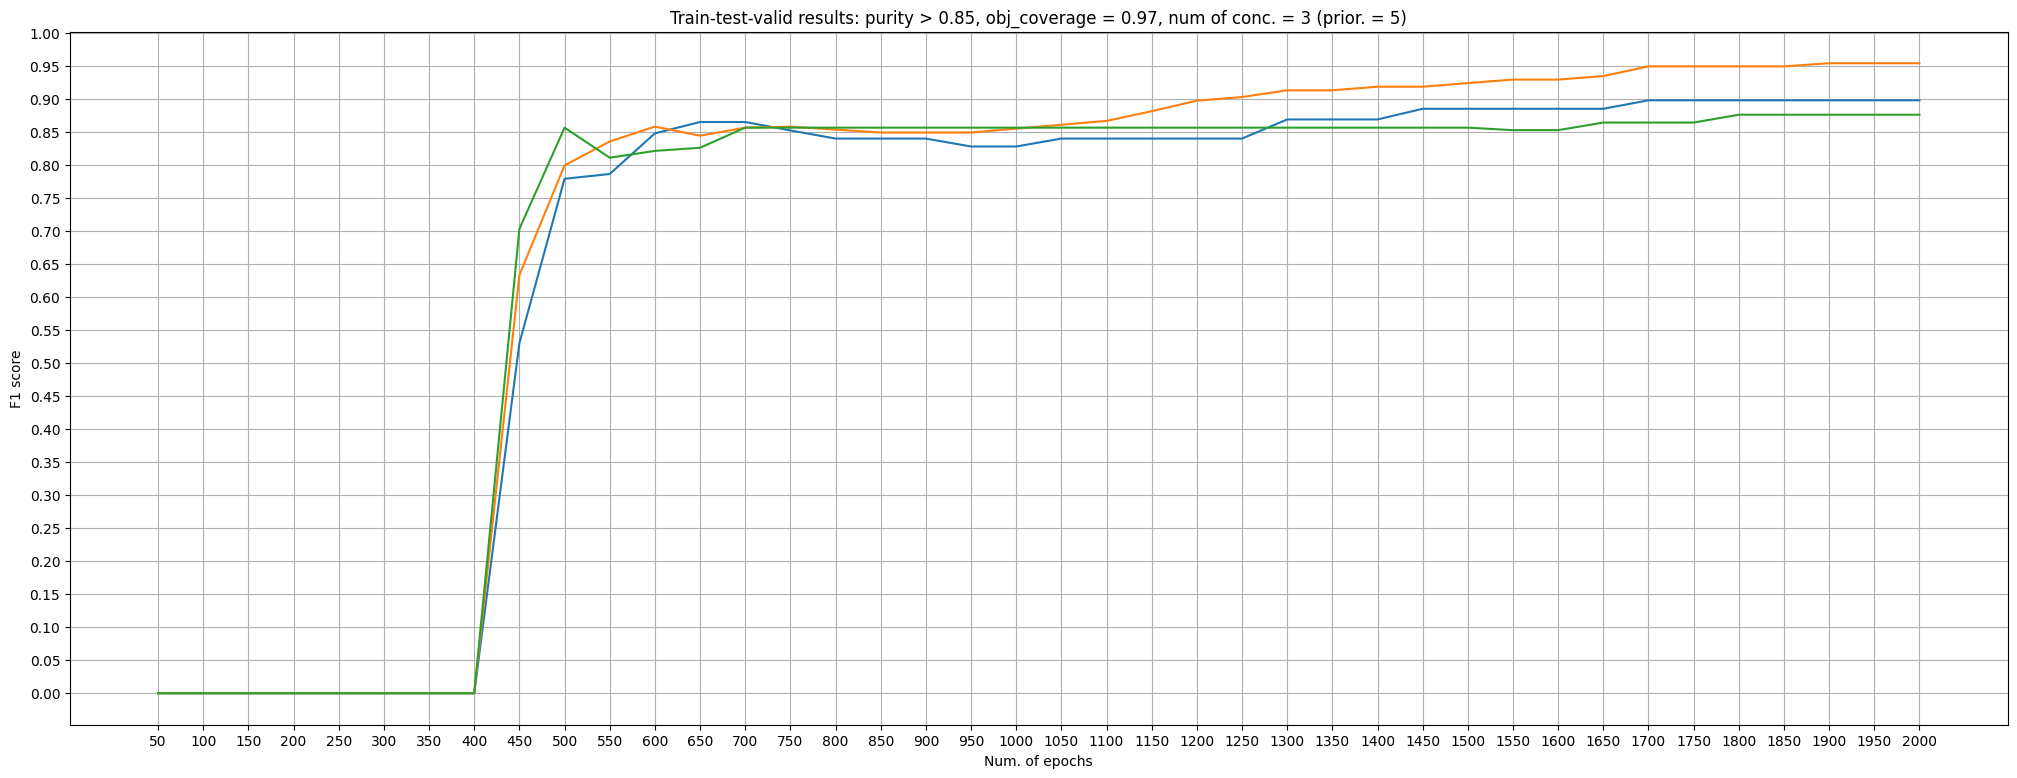

In [425]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(25,9))
plt.plot(epochs_list_,f1_list_ )
plt.plot(epochs_list_,f1_list_train_)
plt.plot(epochs_list_, f1_list_valid_)
plt.title('Train-test-valid results: purity > 0.85, obj_coverage = 0.97, num of conc. = 3 (prior. = 5)')
plt.xlabel("Num. of epochs")
plt.ylabel("F1 score")
plt.grid()
plt.xticks(np.arange(50, 2050, 50))
plt.yticks(np.arange(0, 1.05, 0.05))

In [427]:
res_85_1_3[res_85_1_3['epoch']==1300]

,cov,epoch,F1_score_train,F1_score_val,F1_score_test
25,0.99,1300.0,0.913706,0.857143,0.869565


In [598]:
vis = LineVizNx(node_label_font_size=14, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn_.attributes))+'\n\n')
edge_weights = cn_.edge_weights_from_network()

In [599]:
descr = {'Synfuels', 'Duty-free', 'Physician', 'Missile'}

traced = cn_.trace_description(descr, include_targets=False)

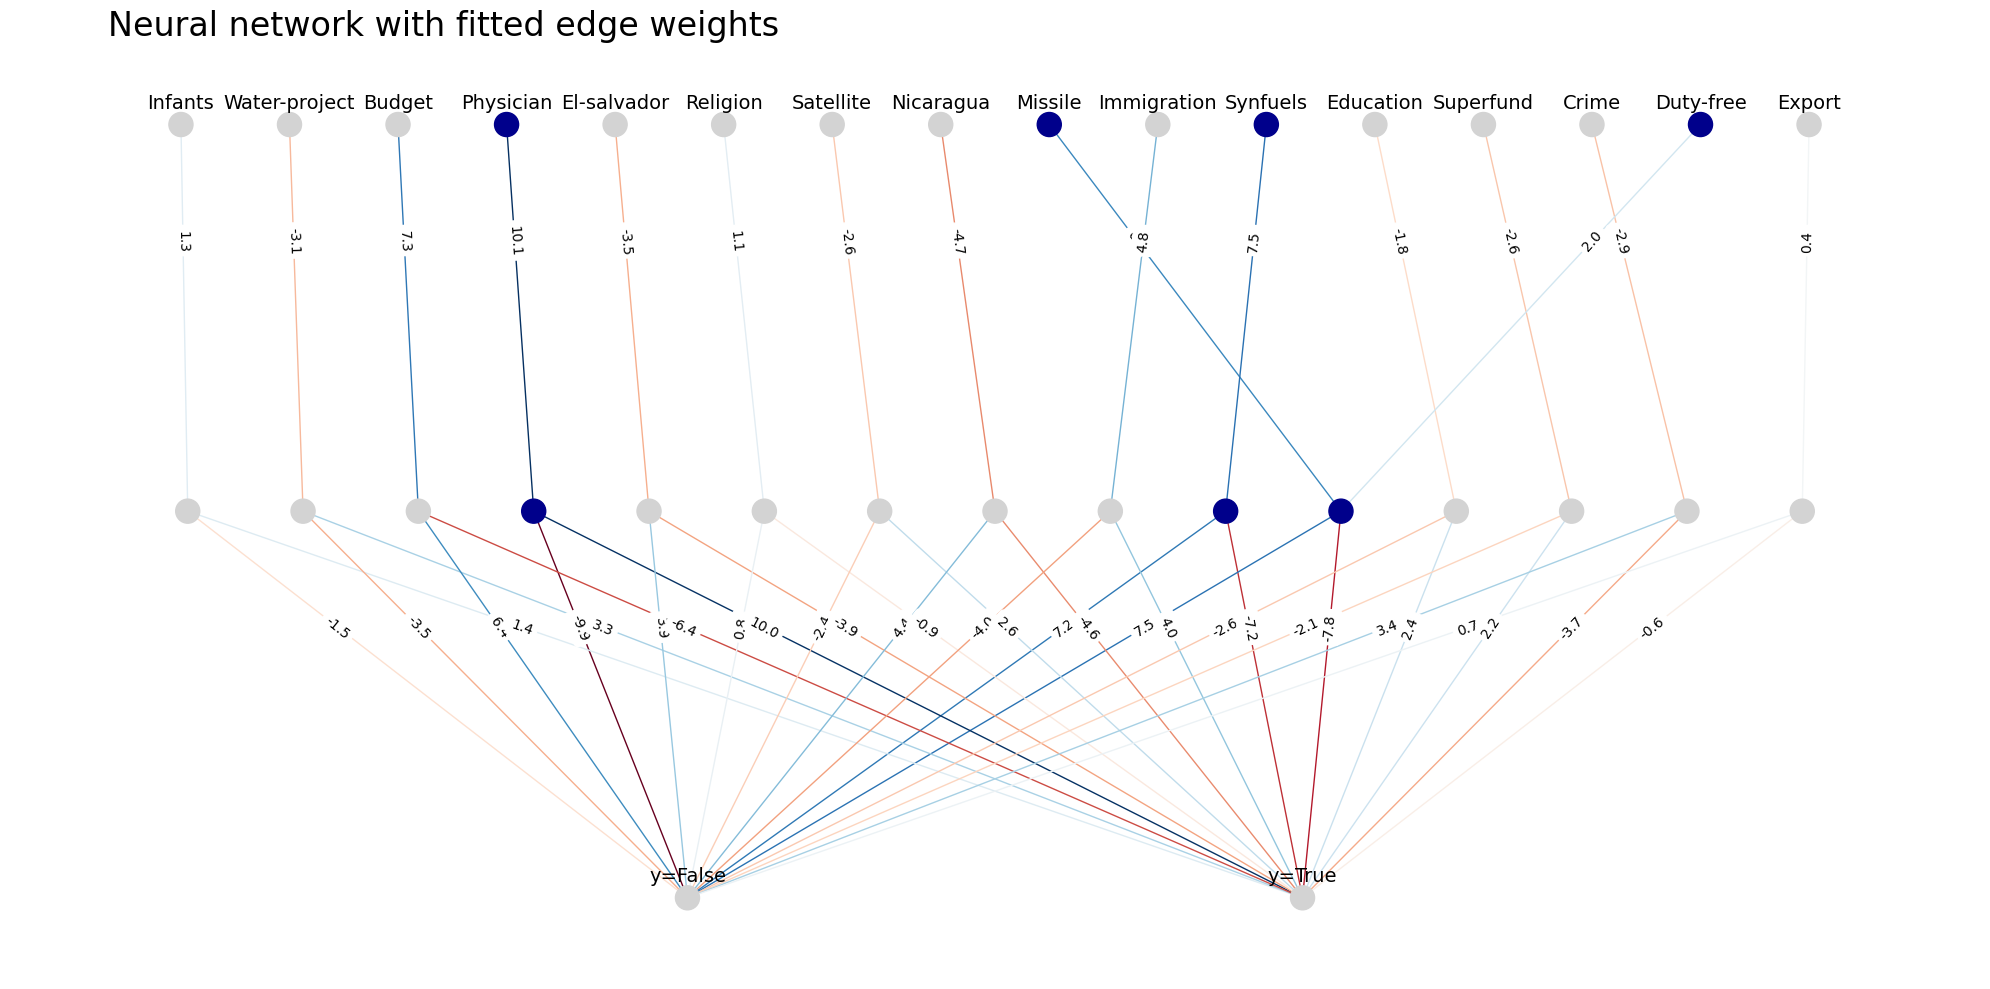

In [600]:
import networkx as nx

fig, ax = plt.subplots(figsize=(20,10))

vis.draw_poset(
    cn_.poset, ax=ax, 
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn_.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn_.poset))],
    edge_color=[edge_weights[edge] for edge in cn_.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,
)
nx.draw_networkx_edge_labels(cn_.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, x=0.05, loc='left')
plt.tight_layout()
plt.subplots_adjust()
#plt.savef

In [108]:
def nn_training(k, cn_, pur_, max_cov, L_ind_i, X_train_, y_train_, X_test_, y_test_, exp_res_2_bank_33_51):
    print(pur_)
    f1_list_ = []
    f1_list_train_ = []
    epochs_list_ = []

    for i in range(100):
        #k = 100
        if i % 10 == 0:
            print('Epoch ', k*(i+1))
        epochs_list_.append(k*(i+1))
        if i == 0:
            cn_.fit(X_train_, y_train_, k)
        else:
            cn_.fit_2(X_train_, y_train_, k)
        pred_all_ = cn_.predict(X_test_)
        pred_train_all_ = cn_.predict(X_train_)
        pred_ = pred_all_[1]
        pred_train_ = pred_train_all_[1]

        #print('score train:', f1_score(y_train_, pred_train_))
        #print('score test:', f1_score(y_test_, pred_))
        f1_list_.append(f1_score(y_test_, pred_))
        f1_list_train_.append(f1_score(y_train_, pred_train_))


        exp_res_2_bank_33_51.loc[len(exp_res_2_bank_33_51)] = [pur_, max_cov, L_ind_i, k*(i+1), f1_score(y_train_, pred_train_), f1_score(y_test_, pred_)]


 
        
    return epochs_list_, f1_list_, f1_list_train_
    

In [105]:
def fig_fitted_network(cn_, dataset, pur, t, n, max_cov, chosen):
    vis = LineVizNx(node_label_font_size=14, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn_.attributes))+'\n\n')
    edge_weights = cn_.edge_weights_from_network()
    fig, ax = plt.subplots(figsize=(15,10))

    vis.draw_poset(
        cn_.poset, ax=ax, 
        flg_node_indices=False,
        node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn_.attributes), only_new_attrs=True)+'\n\n',
        edge_color=[edge_weights[edge] for edge in cn_.poset.to_networkx().edges],
        edge_cmap=plt.cm.RdBu,
    )
    nx.draw_networkx_edge_labels(cn_.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

    plt.title('Neural network with fitted edge weights', size=24, x=0.05, loc='left')
    plt.tight_layout()
    plt.subplots_adjust()
    name = dataset + '-pur-' + str(pur)+'-' + str(t)+ '_'+str(n) +'cover' + str(max_cov)+ '-'+str(chosen)+'2'+'.png'
    plt.savefig(name)

In [106]:
def plot_curves(epochs_list_,f1_list_, f1_list_train_, dataset, pur, t, n, max_cov, L_ind_i):
    plt.figure(figsize=(25,8))
    plt.plot(epochs_list_,f1_list_)
    plt.plot(epochs_list_,f1_list_train_)
    plt.title('Train-test results pur ' + str(pur)+'-' + str(t)+ '_'+str(n) +'cover' + str(max_cov)+ '-'+str(chosen))
    plt.xlabel("# epochs")
    plt.ylabel("F1 score")
    plt.grid()
    plt.xticks(np.arange(0, 10200, 200))
    plt.yticks(np.arange(0, 1, 0.05))
    name = dataset + '-pur-' + str(pur)+'-' + str(t)+ '_'+str(n) +'cover' + str(len(max_cov))+ '-'+str(L_ind_i)+'1'+'.png'
    plt.savefig(name)